## Loading packages

In [2]:
import seaborn as sb
import plotly.express as ply

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import classification_report as cr, confusion_matrix as cm, roc_auc_score as ras

  
pd.set_option('display.max_columns', 100)

In [26]:
from google.colab import drive  # Accessing Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# df = pd.read_csv('/content/drive/MyDrive/ColabNotebooks/IndustryGrade_Proj/data_ai.csv')  # Reading Data File from Google Drive
df = pd.read_csv(r'C:\Users\USER\Documents\GiTHub\NIT-W-Edureka\Vehicle_Insurance/data_ai.csv')
df_org = df.copy()                                                                        # Copy orginal data for Easy Retrival to avoid  re-reading
df.drop('id', inplace = True, axis = 1)                                                   # Droping Index feature
df.shape

(595212, 58)

#Exploratory Data Analysis

##a. EDA Numeric

In [4]:
dict_vs = {'feature':[], 'unique_values': [],  'nunique':[], 'min': [], 'max': [], 'mean':[],'stdev':[],'Q1':[],'Q3':[], 'Q2':[]} 
for col in df.columns:
    dict_vs['feature'].append(col)
    dict_vs['nunique'].append(df[col].nunique())
    dict_vs['unique_values'].append(df[col].unique())
    dict_vs['min'].append(df[col].min()) # Since Numeric Changed to Category
    dict_vs['max'].append(df[col].max())
    dict_vs['mean'].append(df[col].mean())
    dict_vs['stdev'].append(df[col].std())
    dict_vs['Q1'].append(df[col].quantile(0.25))
    dict_vs['Q3'].append(df[col].quantile(0.75))
    dict_vs['Q2'].append(df[col].quantile(0.5))

pd.DataFrame(dict_vs)

feature                                      unique_values  \
0           target                                             [0, 1]   
1        ps_ind_01                           [2, 1, 5, 0, 4, 3, 6, 7]   
2    ps_ind_02_cat                                   [2, 1, 4, 3, -1]   
3        ps_ind_03             [5, 7, 9, 2, 0, 4, 3, 1, 11, 6, 8, 10]   
4    ps_ind_04_cat                                         [1, 0, -1]   
5    ps_ind_05_cat                          [0, 1, 4, 3, 6, 5, -1, 2]   
6    ps_ind_06_bin                                             [0, 1]   
7    ps_ind_07_bin                                             [1, 0]   
8    ps_ind_08_bin                                             [0, 1]   
9    ps_ind_09_bin                                             [0, 1]   
10   ps_ind_10_bin                                             [0, 1]   
11   ps_ind_11_bin                                             [0, 1]   
12   ps_ind_12_bin                                             [0, 1]   
13   ps_ind_13_bin                                             [0, 1]   
14       ps_ind_14                                    [0, 1, 2, 3, 4]   
15       ps_ind_15     [11, 3, 12, 8, 9, 6, 13, 4, 10, 5, 7, 2, 0, 1]   
16   ps_ind_16_bin                                             [0, 1]   
17   ps_ind_17_bin                                             [1, 0]   
18   ps_ind_18_bin                                             [0, 1]   
19       ps_reg_01  [0.7, 0.8, 0.0, 0.9, 0.6, 0.5, 0.4, 0.3, 0.2, ...   
20       ps_reg_02  [0.2, 0.4, 0.0, 0.6, 1.8, 0.1, 0.7, 1.4, 0.9, ...   
21       ps_reg_03  [0.718070331, 0.766077672, -1.0, 0.580947502, ...   
22   ps_car_01_cat         [10, 11, 7, 6, 9, 5, 4, 8, 3, 0, 2, 1, -1]   
23   ps_car_02_cat                                             [1, 0]   
24   ps_car_03_cat                                         [-1, 0, 1]   
25   ps_car_04_cat                     [0, 1, 8, 9, 2, 6, 3, 7, 4, 5]   
26   ps_car_05_cat                                         [1, -1, 0]   
27   ps_car_06_cat  [4, 11, 14, 13, 6, 15, 3, 0, 1, 10, 12, 9, 17,...   
28   ps_car_07_cat                                         [1, -1, 0]   
29   ps_car_08_cat                                             [0, 1]   
30   ps_car_09_cat                                [0, 2, 3, 1, -1, 4]   
31   ps_car_10_cat                                          [1, 0, 2]   
32   ps_car_11_cat  [12, 19, 60, 104, 82, 99, 30, 68, 20, 36, 101,...   
33       ps_car_11                                   [2, 3, 1, 0, -1]   
34       ps_car_12  [0.4, 0.316227766, 0.374165739, 0.316069613, 0...   
35       ps_car_13  [0.883678918, 0.618816519, 0.641585716, 0.5429...   
36       ps_car_14  [0.370809924, 0.388715835, 0.347275107, 0.2949...   
37       ps_car_15  [3.605551276, 2.449489743, 3.31662479, 2.0, 3....   
38      ps_calc_01  [0.6, 0.3, 0.5, 0.4, 0.7, 0.2, 0.1, 0.9, 0.8, ...   
39      ps_calc_02  [0.5, 0.1, 0.7, 0.9, 0.6, 0.8, 0.4, 0.0, 0.3, ...   
40      ps_calc_03  [0.2, 0.3, 0.1, 0.0, 0.4, 0.5, 0.6, 0.8, 0.9, ...   
41      ps_calc_04                                 [3, 2, 1, 4, 0, 5]   
42      ps_calc_05                              [1, 2, 4, 3, 0, 5, 6]   
43      ps_calc_06                 [10, 9, 7, 6, 8, 5, 4, 3, 2, 1, 0]   
44      ps_calc_07                     [1, 5, 3, 2, 4, 6, 0, 7, 8, 9]   
45      ps_calc_08               [10, 8, 11, 6, 9, 7, 5, 12, 4, 3, 2]   
46      ps_calc_09                           [1, 2, 4, 3, 0, 5, 6, 7]   
47      ps_calc_10  [5, 7, 2, 12, 8, 10, 13, 11, 9, 18, 4, 15, 6, ...   
48      ps_calc_11  [9, 3, 4, 2, 7, 6, 5, 10, 8, 1, 0, 13, 11, 12,...   
49      ps_calc_12                 [1, 2, 0, 5, 3, 4, 6, 7, 8, 9, 10]   
50      ps_calc_13     [5, 1, 7, 4, 0, 3, 6, 2, 8, 10, 9, 11, 12, 13]   
51      ps_calc_14  [8, 9, 7, 3, 10, 6, 5, 11, 4, 14, 13, 12, 16, ...   
52  ps_calc_15_bin                                             [0, 1]   
53  ps_calc_16_bin                                             [1, 0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_

##b. Feature Engineering: Grouping and Segregating Features

In [6]:
l_cat = [i for i in df.columns if 'cat' in str(i) ]
l_bin = [i for i in df.columns if 'bin' in str(i) ]
l_reg = [i for i in df.columns if 'reg' in str(i) ]

In [7]:
print(l_cat)
print(len(l_cat))
print(l_bin)
print(len(l_bin))
print(l_reg)
print(len(l_reg))

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
14
['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
17
['ps_reg_01', 'ps_reg_02', 'ps_reg_03']
3


In [8]:
l_ord = []
for i in df.columns:
  if 'cat'not in str(i):
    if 'bin'not in str(i):
      if 'reg'not in str(i):
        if 'target'not in str(i):
          l_ord.append(i)

print(l_ord)
len(l_ord)

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


23

In [9]:
# As per the Instructions given, the above features are all classified to 1. Categorical and 2. Interval Variables
cols_Cat =  l_cat + l_bin
cols_Intv =  l_reg + l_ord
print(cols_Cat)
print(cols_Intv)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


##c. EDA Visual - Univariate Analysis

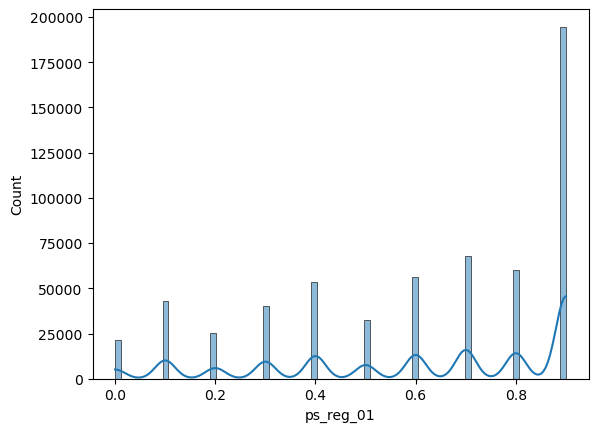

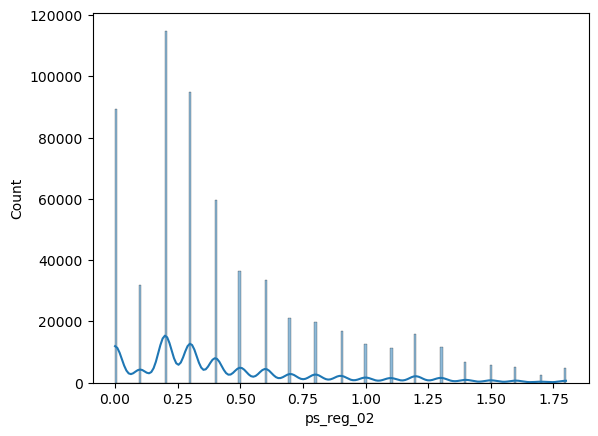

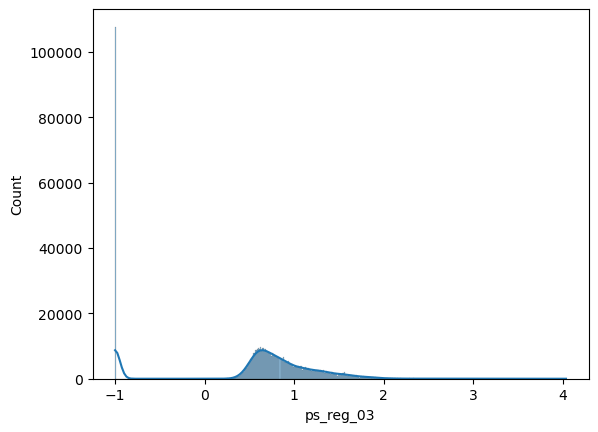

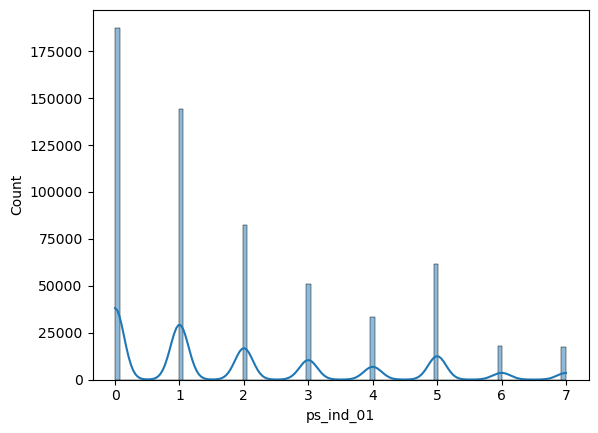

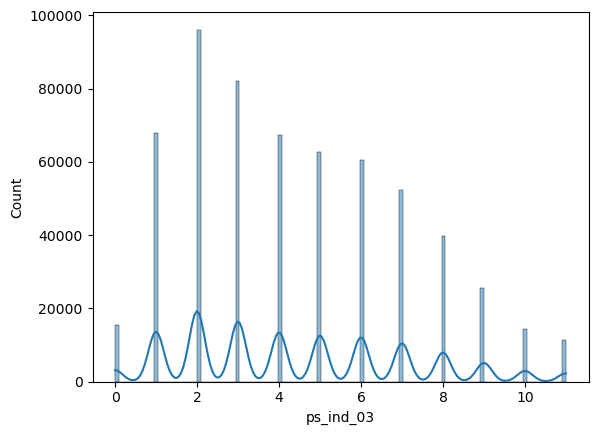

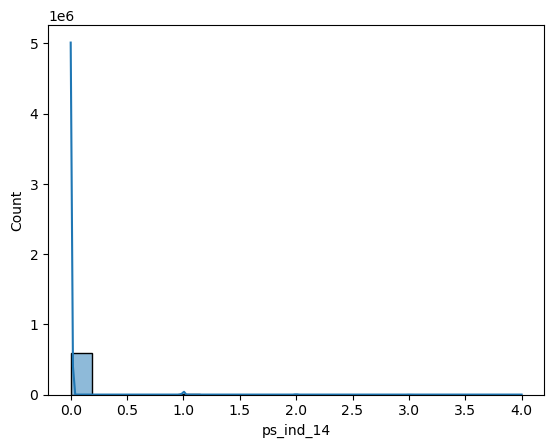

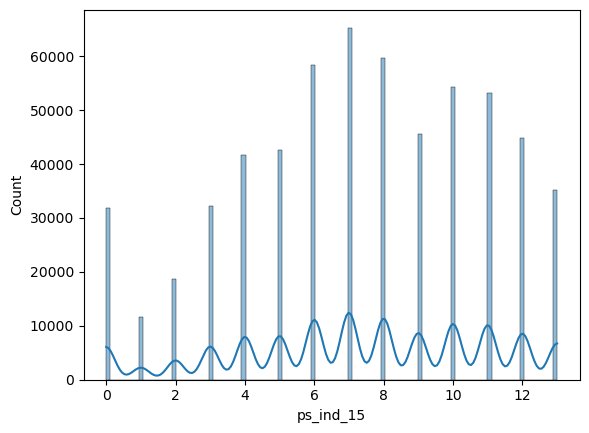

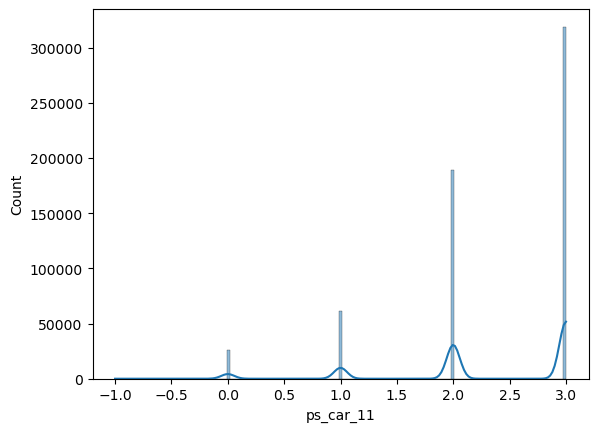

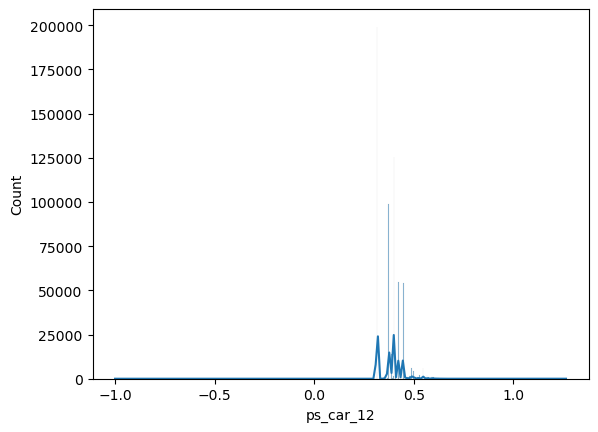

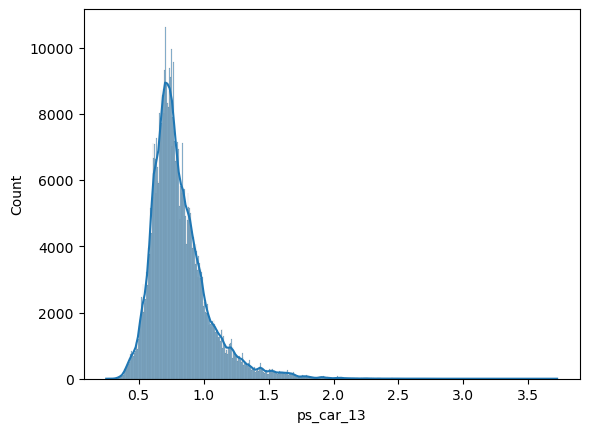

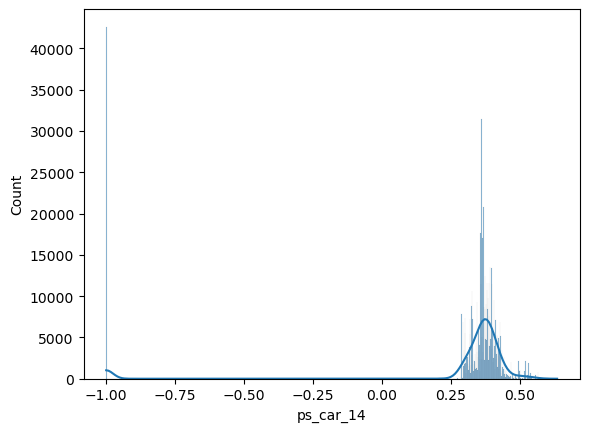

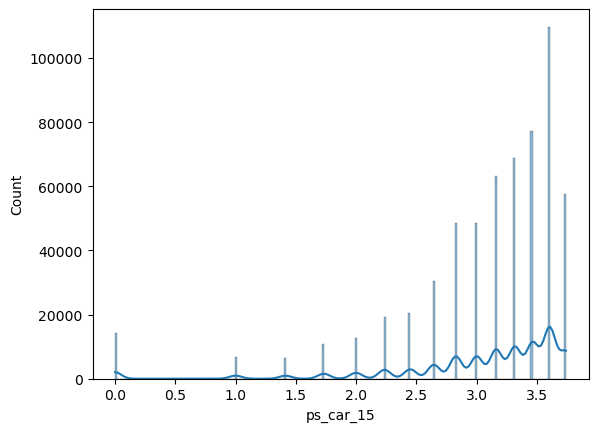

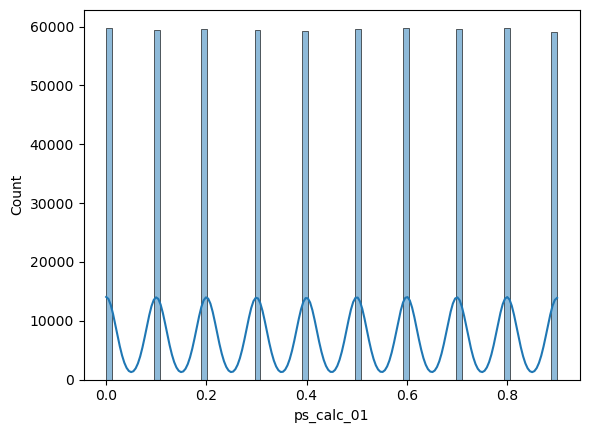

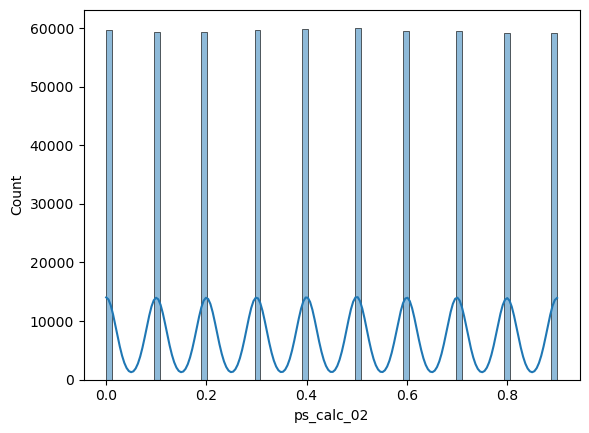

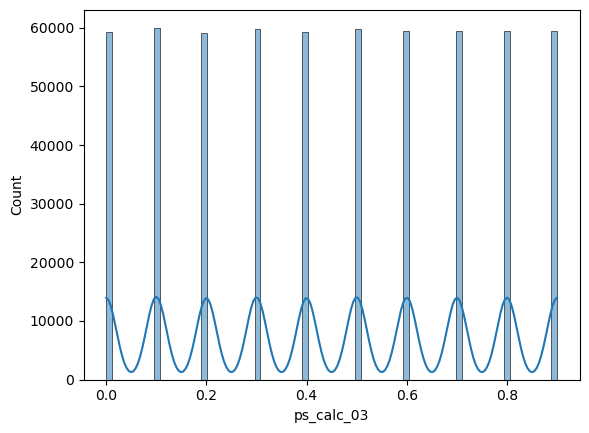

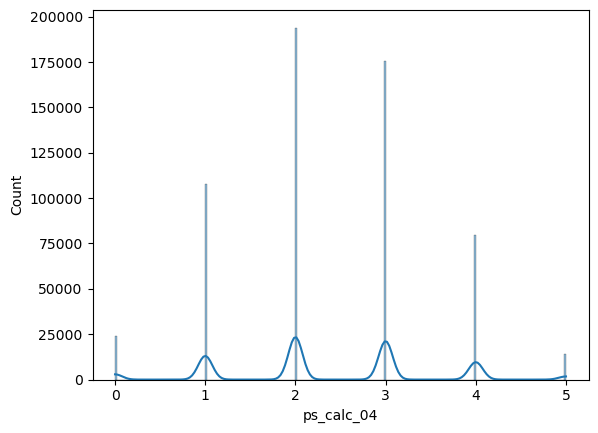

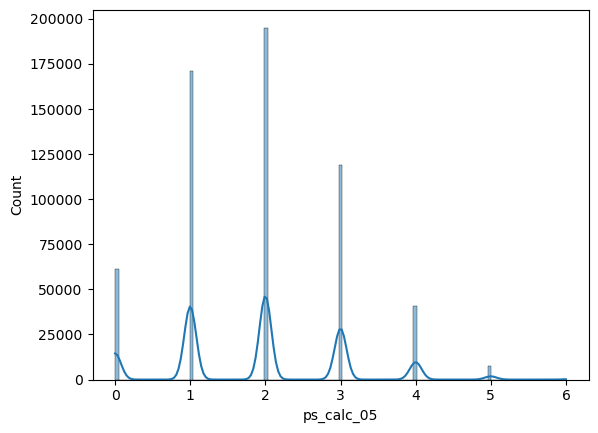

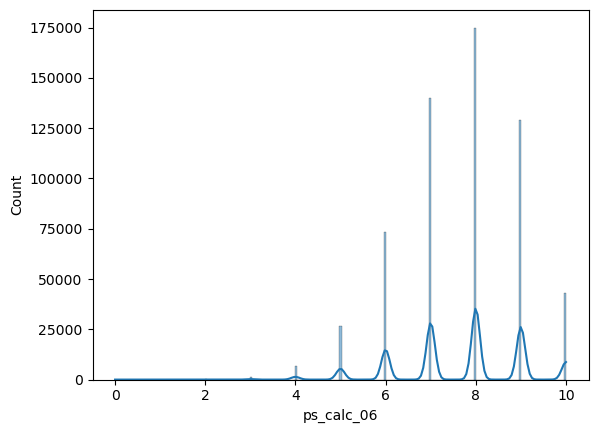

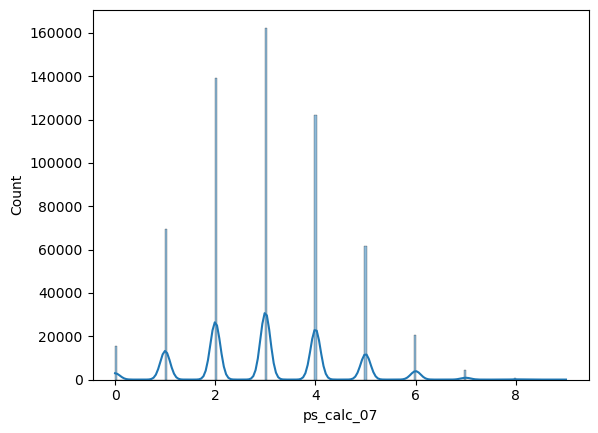

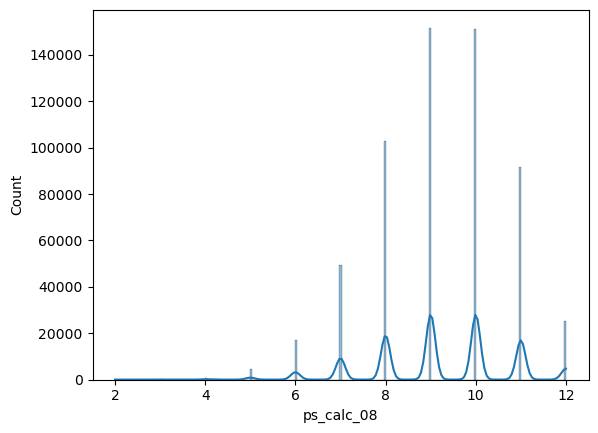

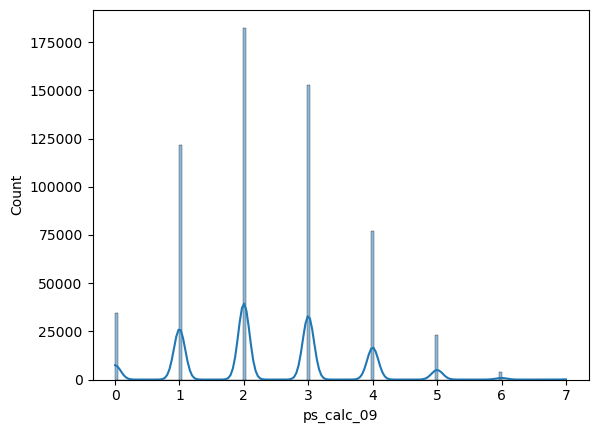

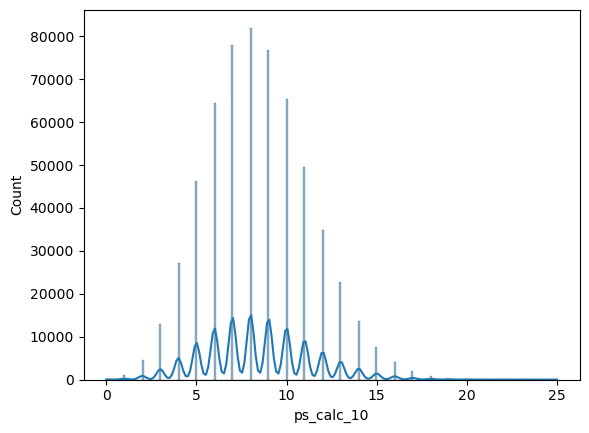

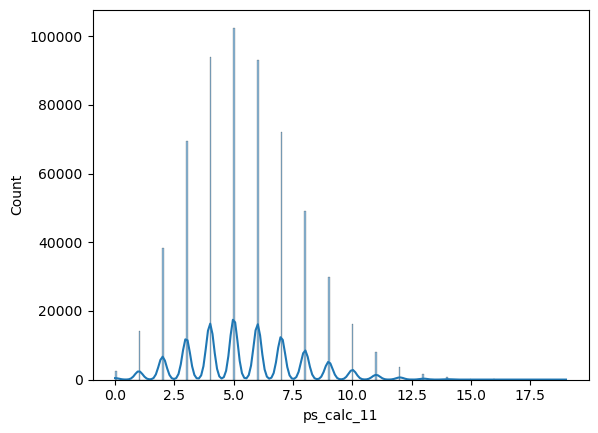

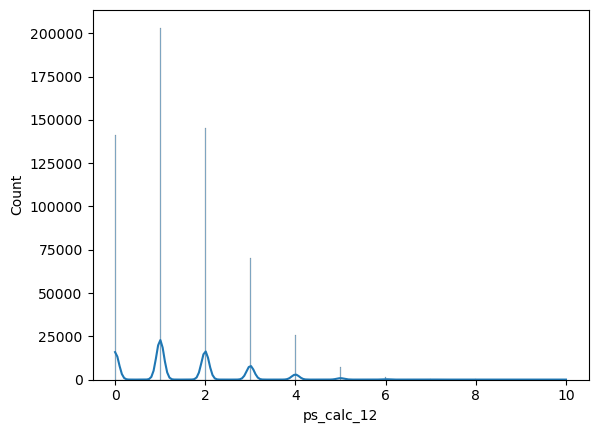

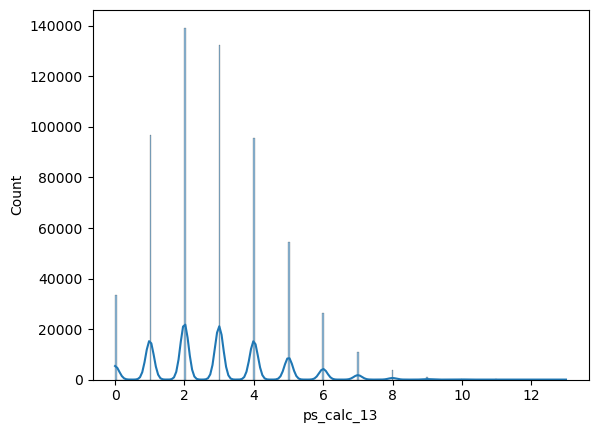

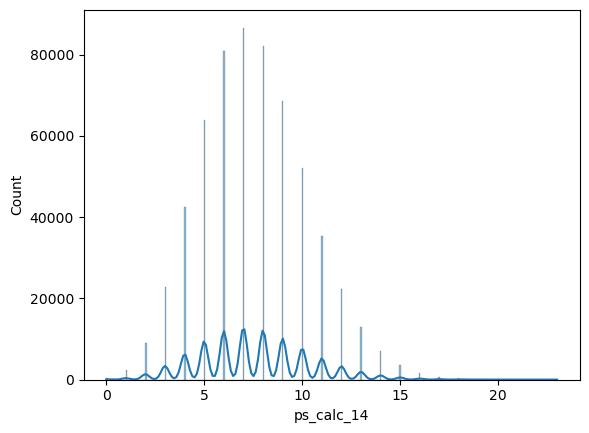

In [10]:
for i in cols_Intv:
  sns.histplot(df[cols_Intv], x = i, kde = True)
  plt.show()

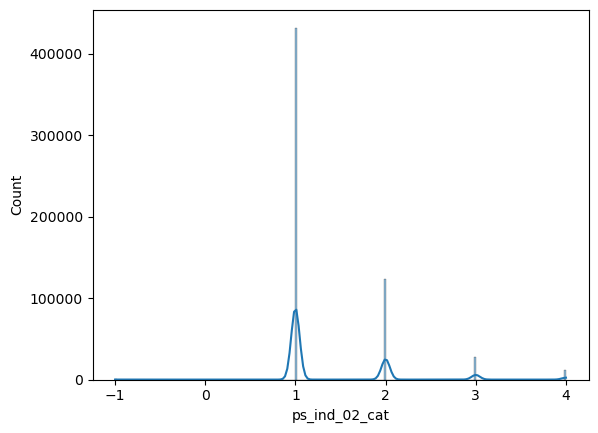

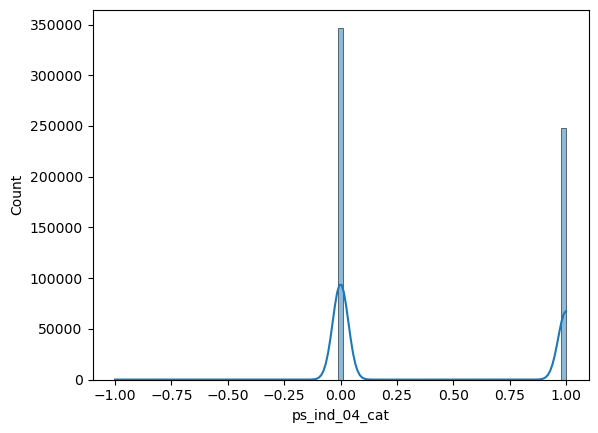

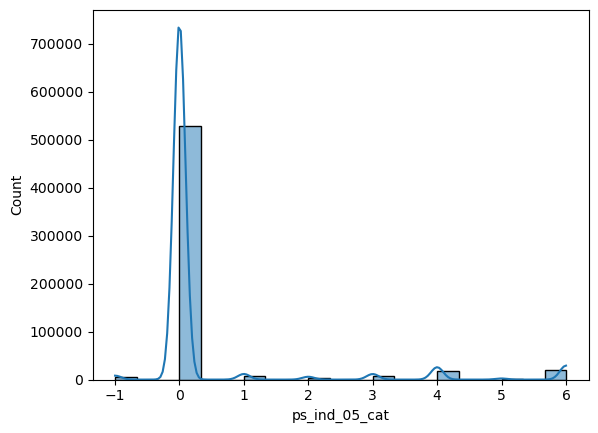

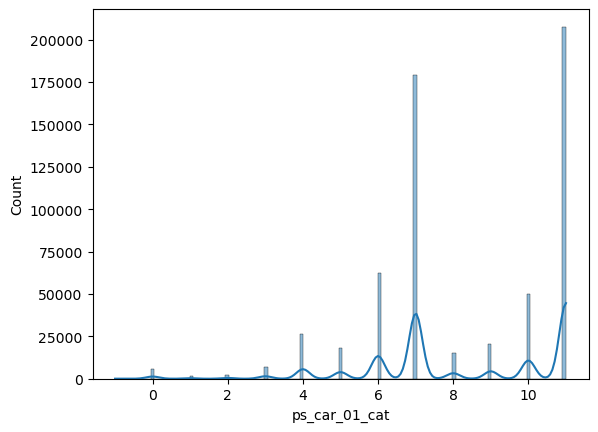

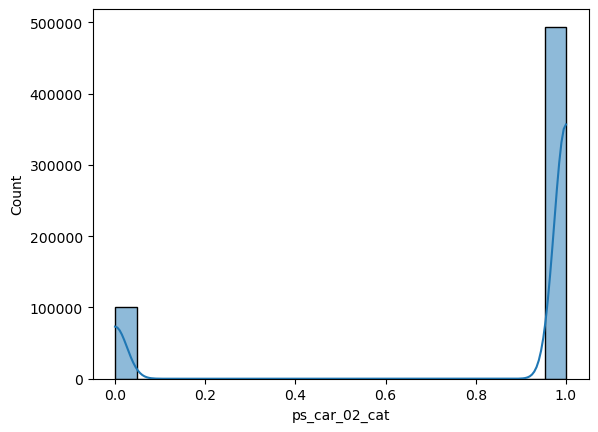

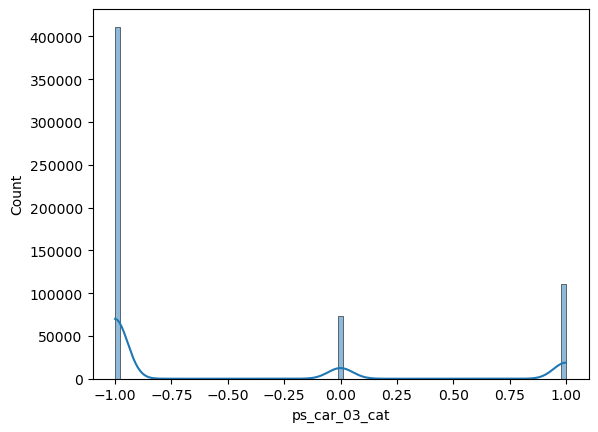

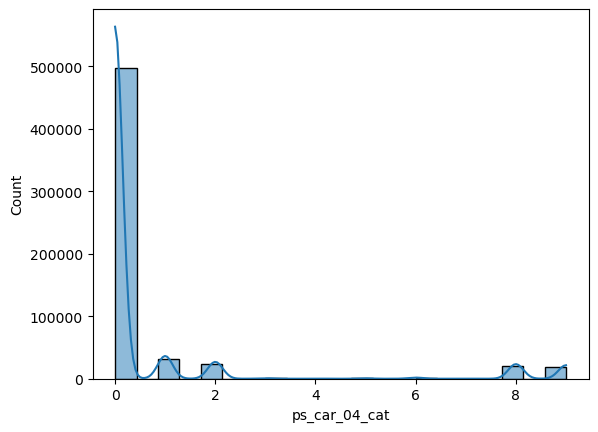

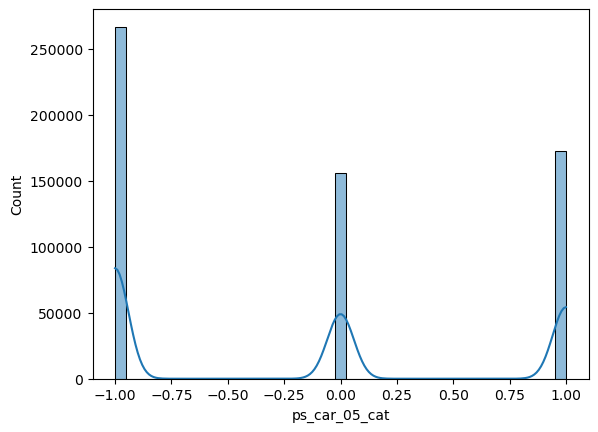

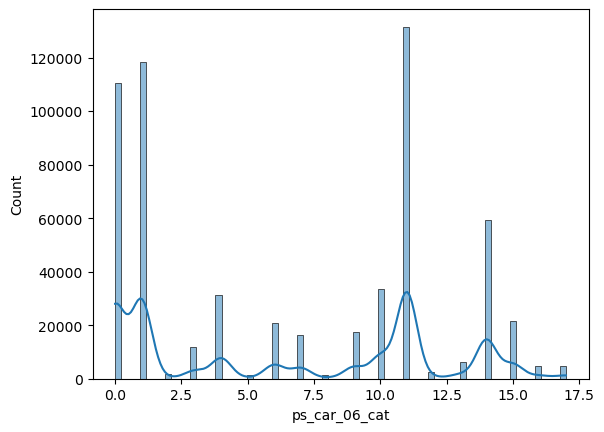

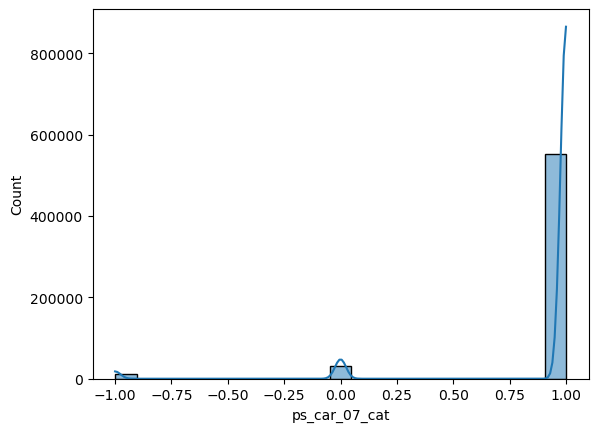

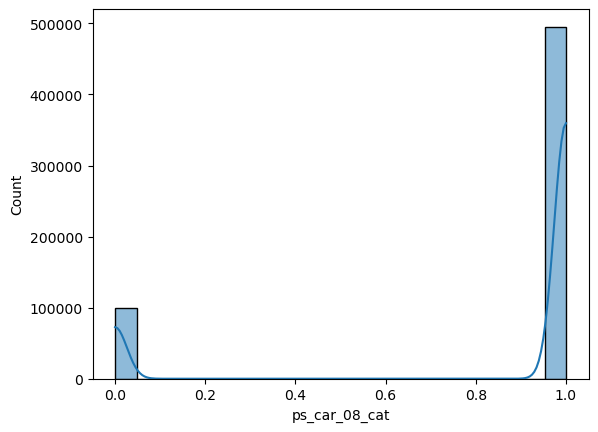

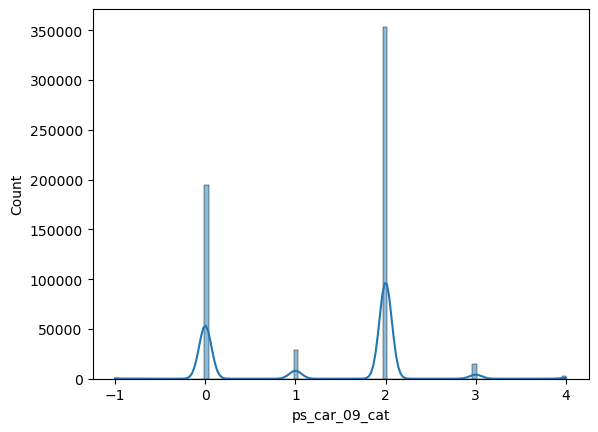

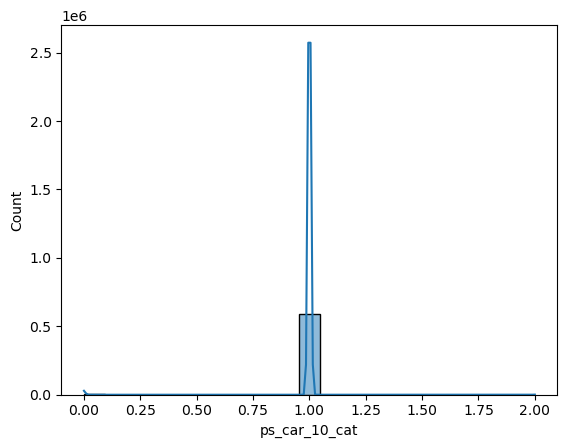

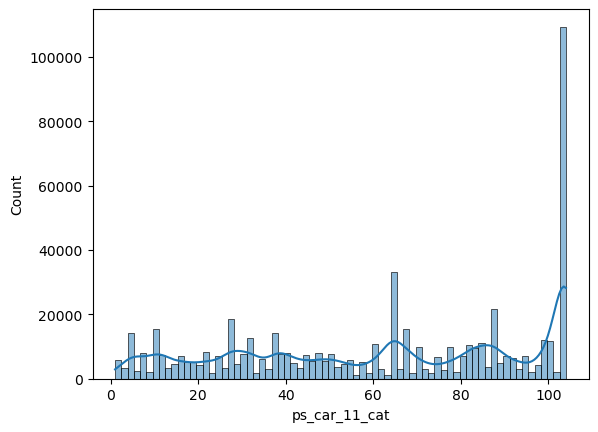

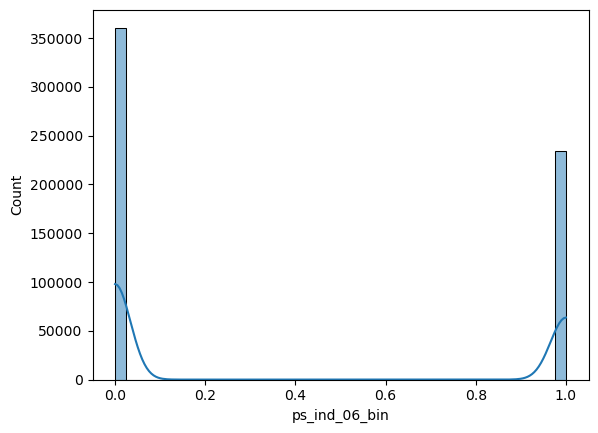

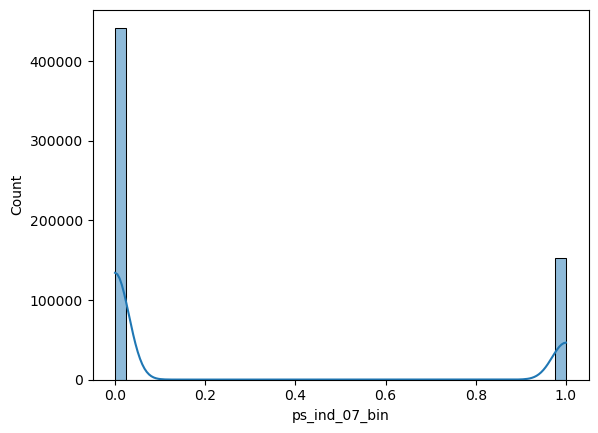

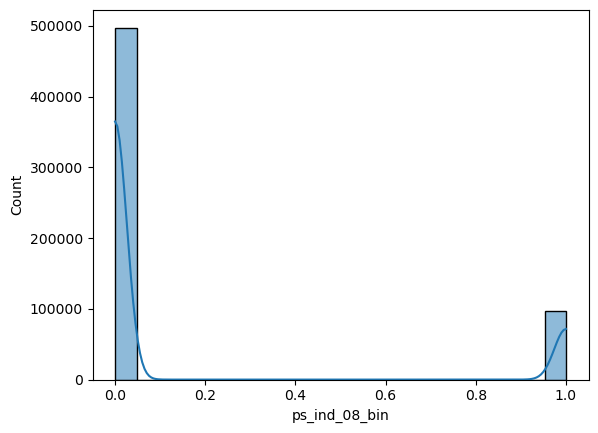

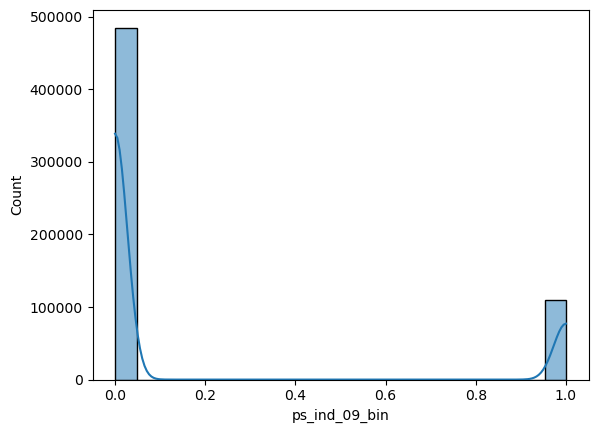

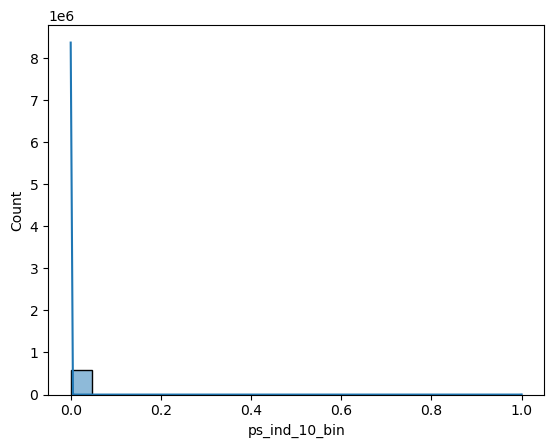

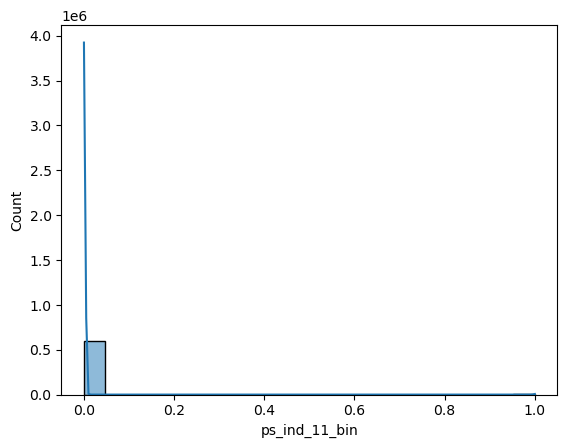

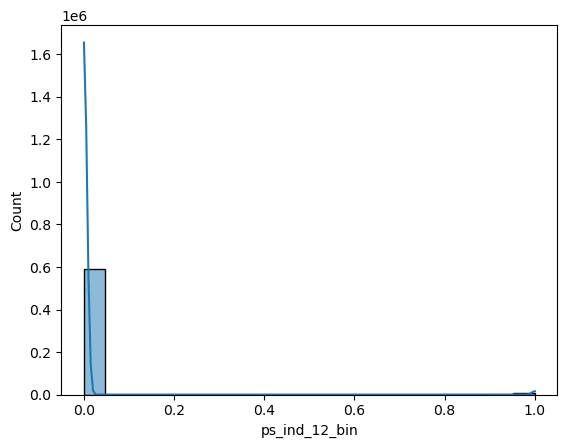

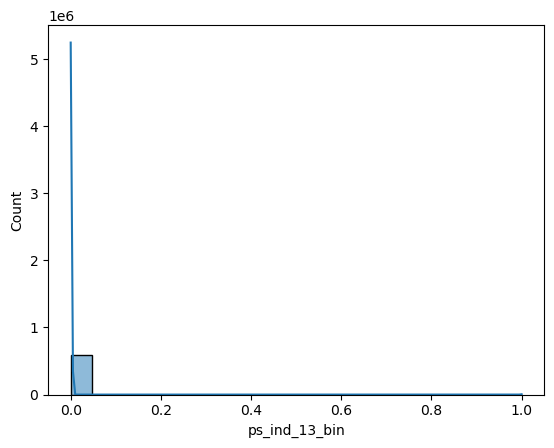

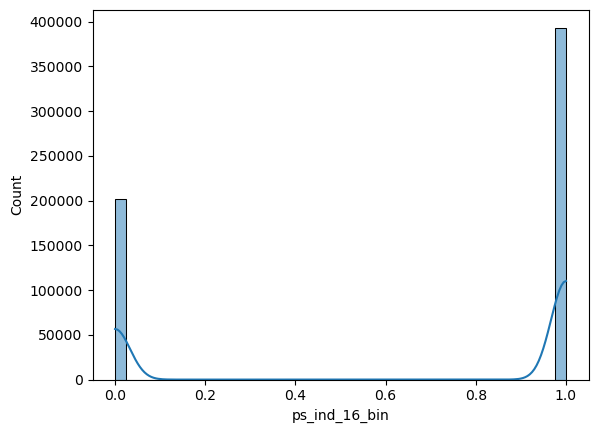

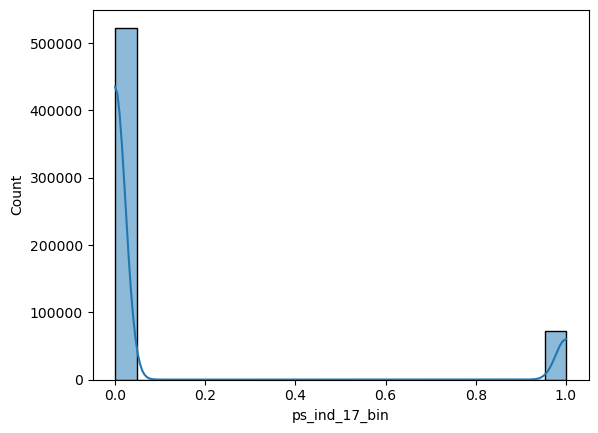

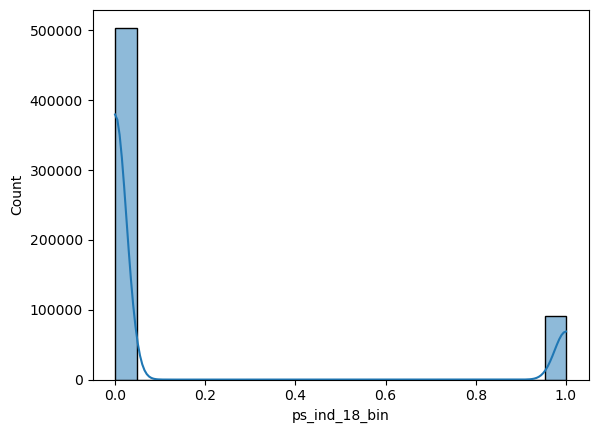

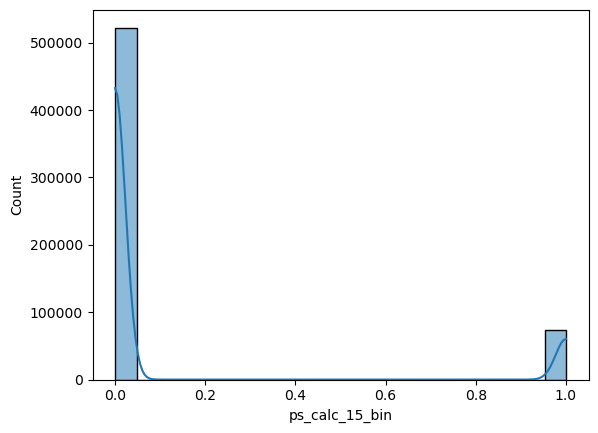

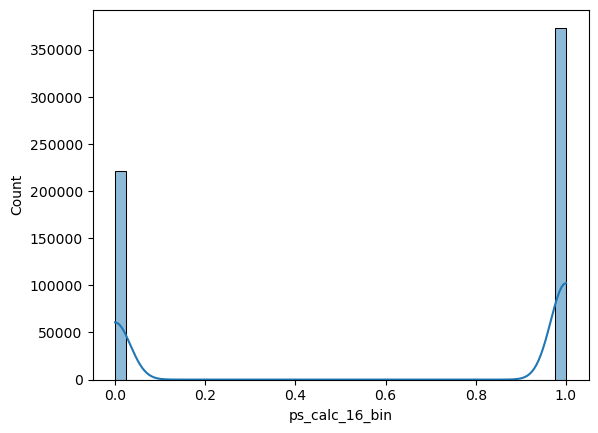

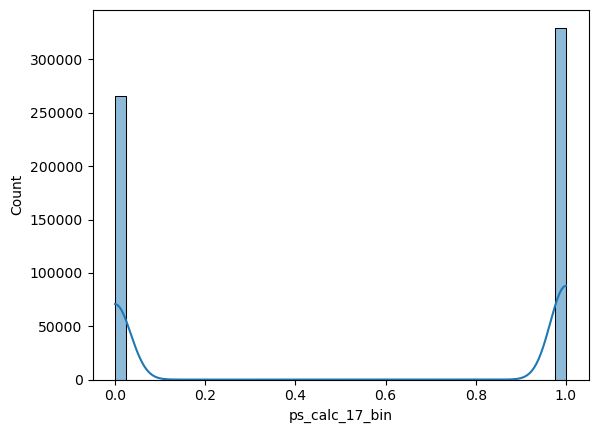

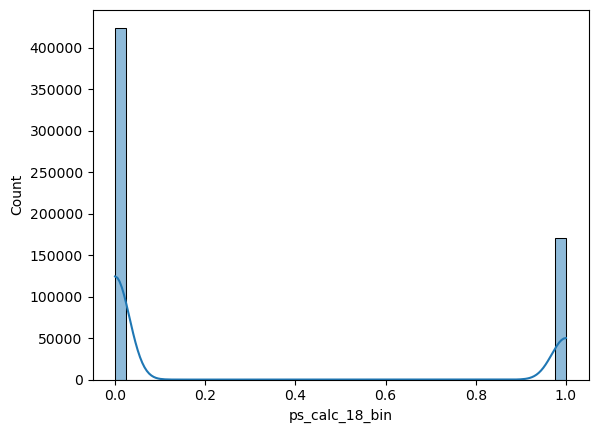

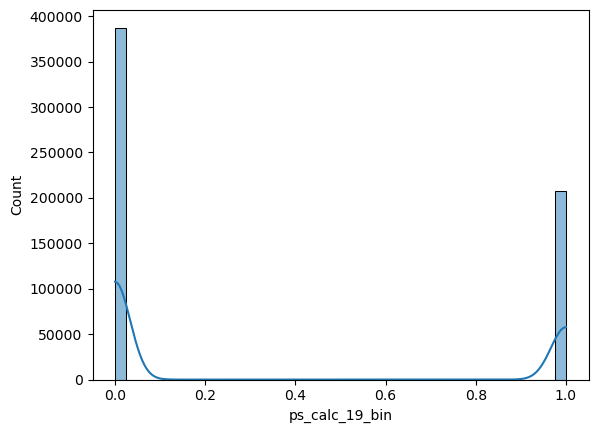

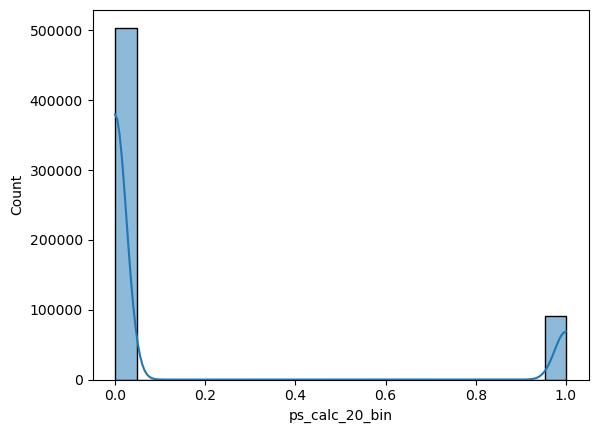

In [11]:
for i in cols_Cat:
  sns.histplot(df[cols_Cat], x = i, kde = True)# y = 'target')
  plt.show()

##INFERENCE: Univariate Analysis
Except ['ps_reg_03, ps_car_12, ps_car_13, ps_car_14, ps_car_15] remaining features are not following regressive distribution.And clearly discrete or Categorical Numeric/Ordinal/Ranked variable

Indentified Misplaced Features by EDA
1. cols_cat_to_bin = ['ps_ind_04_cat','ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat']  # 4

2. cols_reg_to_ord = ['ps_reg_01', 'ps_reg_02',]    # 2

3. cols_ord_to_reg = ['ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']  # 4

4. cols_cat_to_ord = ['ps_ind_02_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_09_cat'] # 4


##d. EDA Visual - Bivariate Analysis (Correlating with Target)

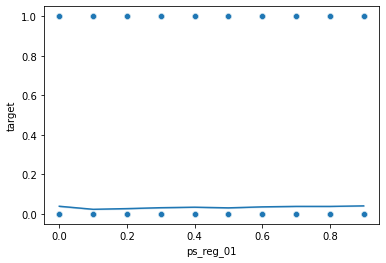

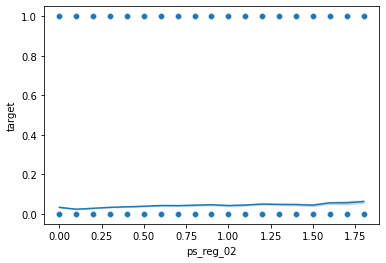

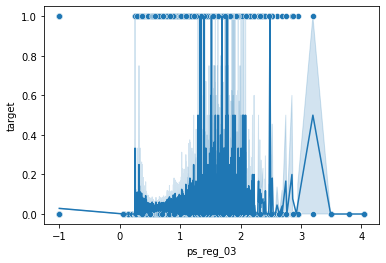

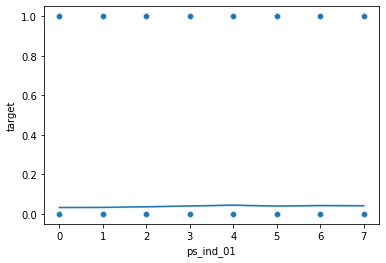

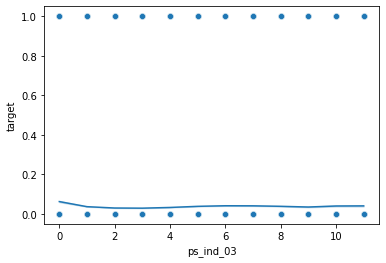

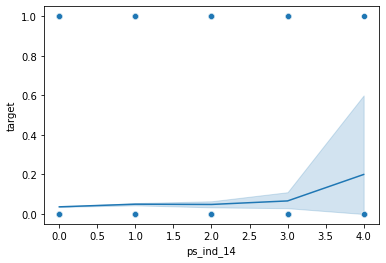

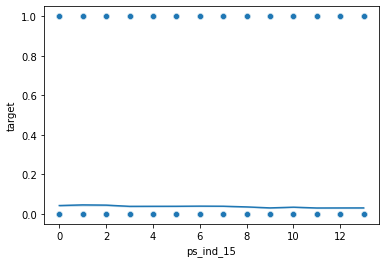

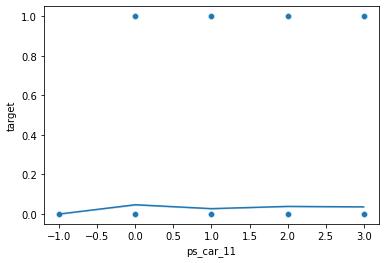

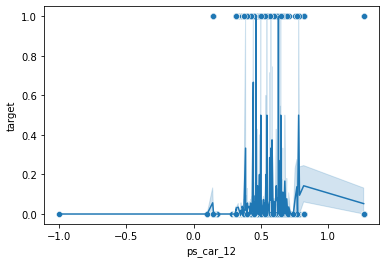

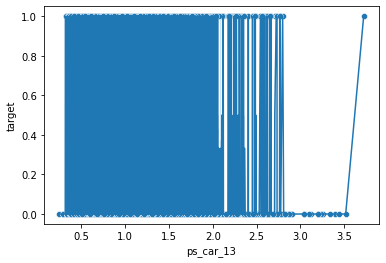

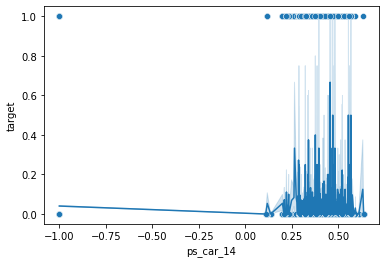

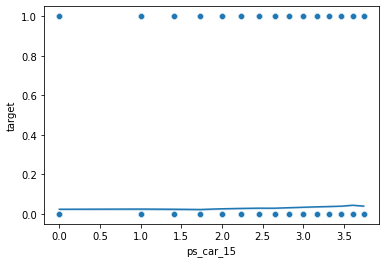

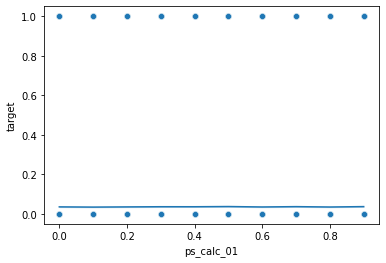

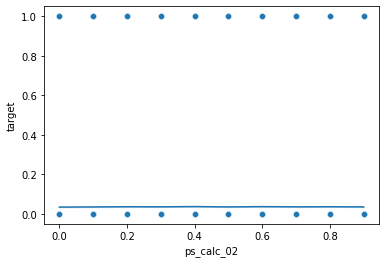

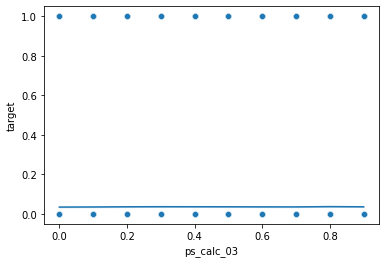

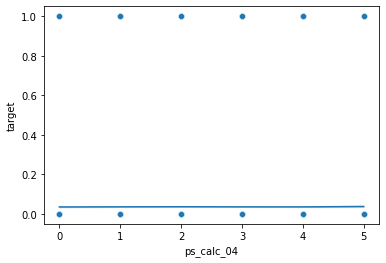

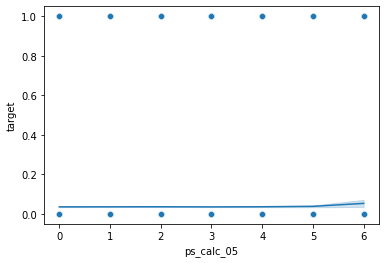

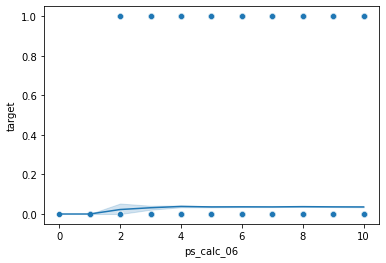

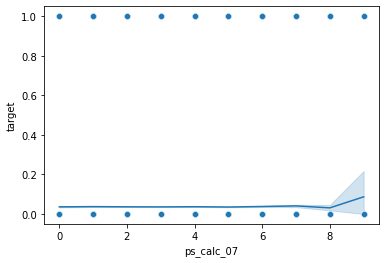

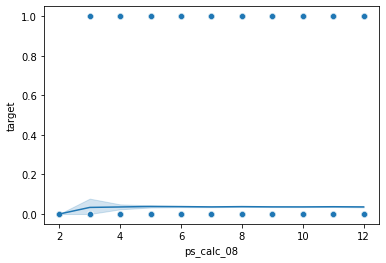

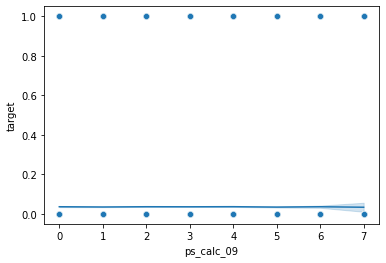

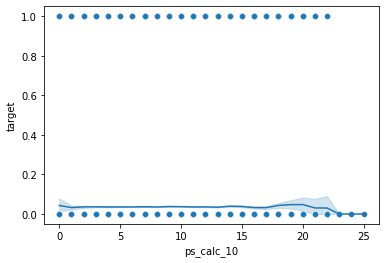

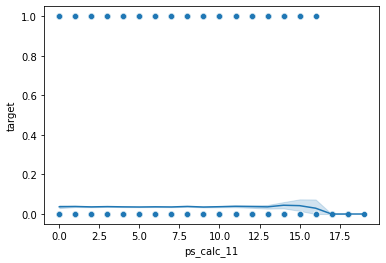

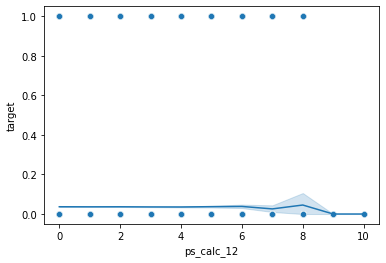

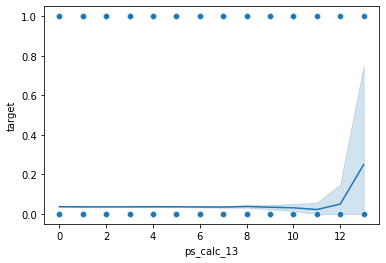

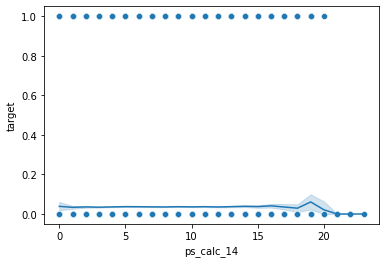

In [36]:
for i in cols_Intv:
  sns.lineplot(x = df[i], y = df['target'])#, kind = bar, hue = i )
  sns.scatterplot(x = df[i], y = df['target'])#, kind = bar, hue = i )
  plt.show()

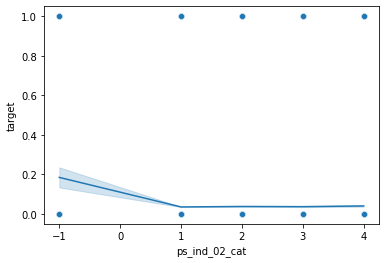

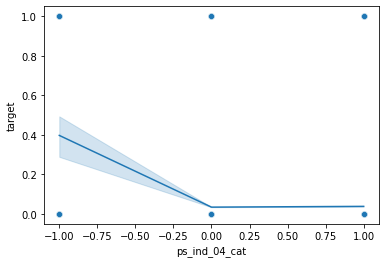

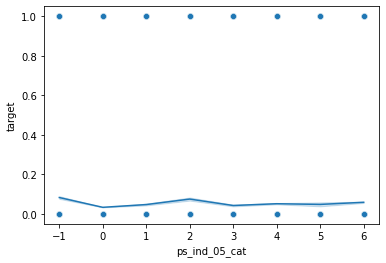

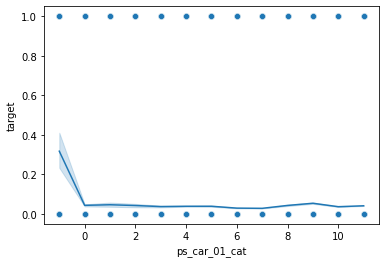

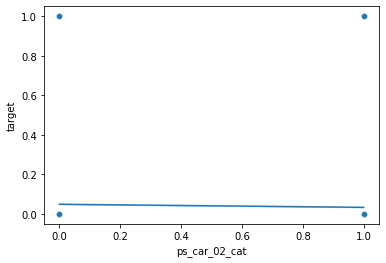

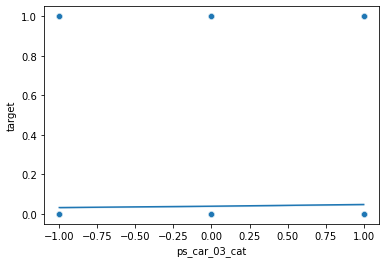

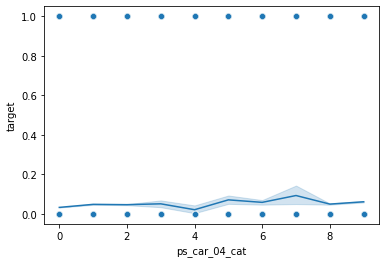

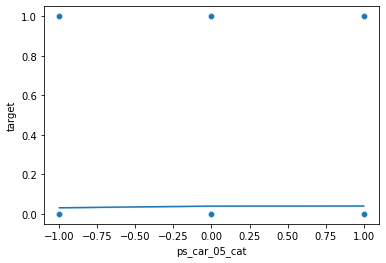

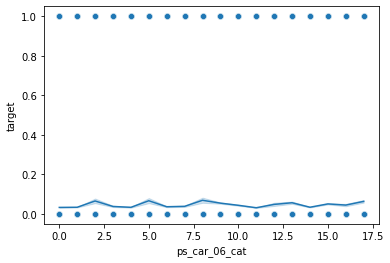

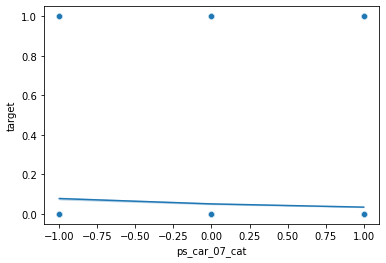

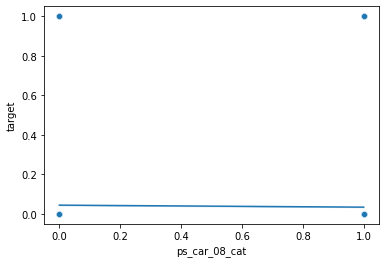

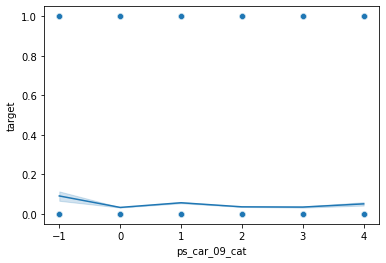

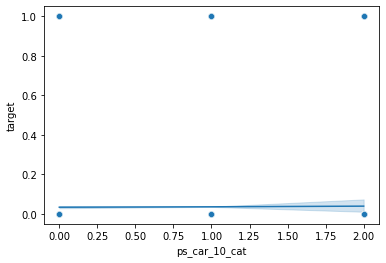

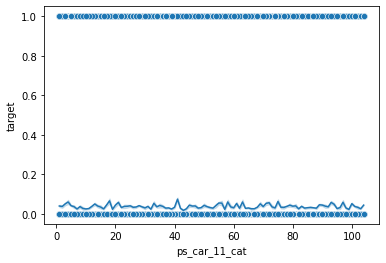

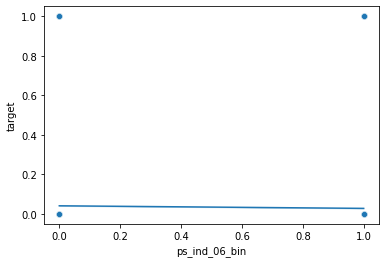

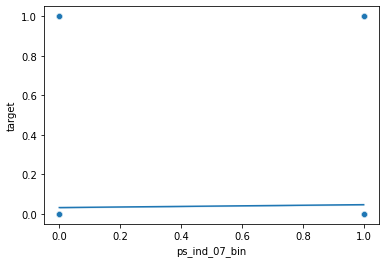

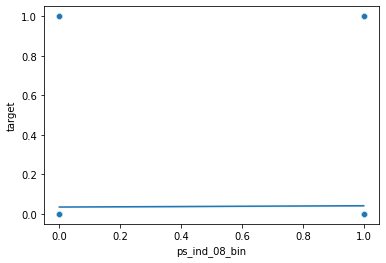

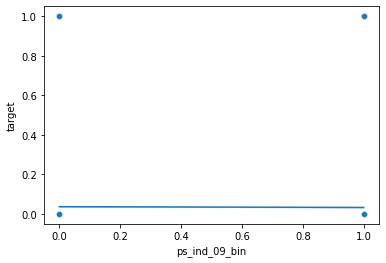

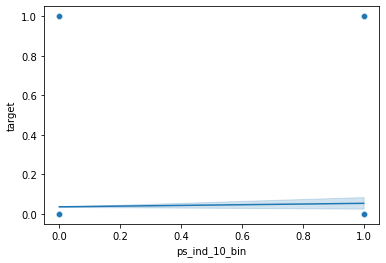

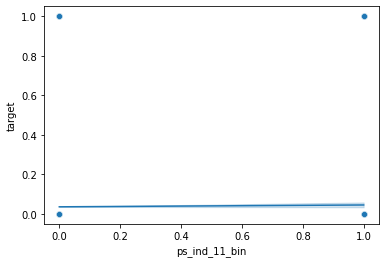

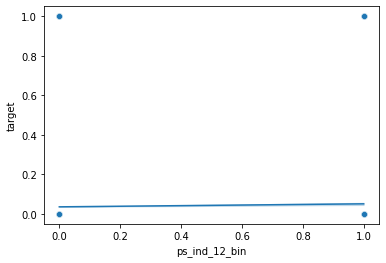

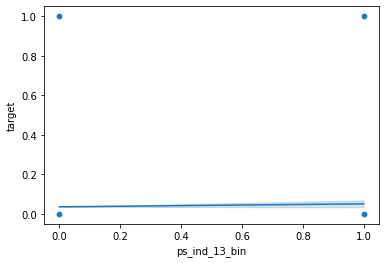

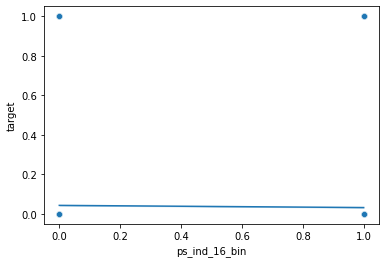

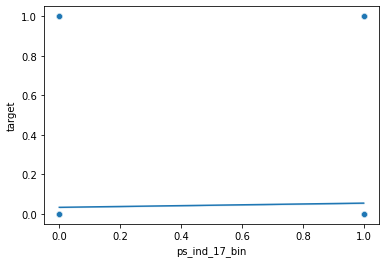

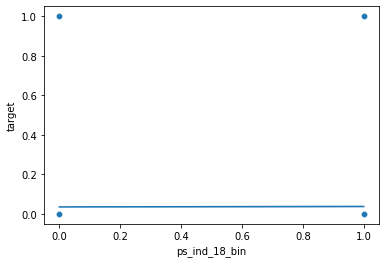

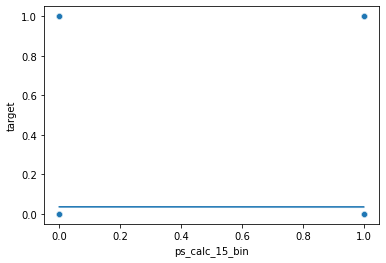

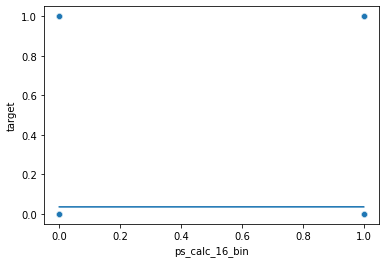

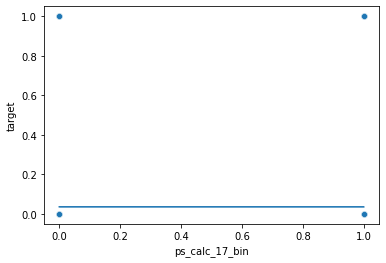

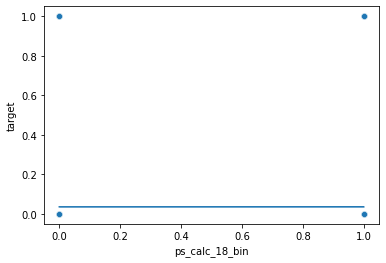

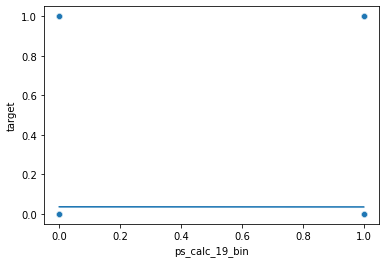

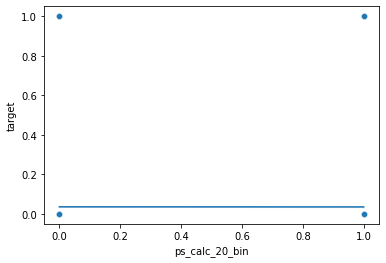

In [37]:
for i in cols_Cat:
  sns.lineplot(x = df[i], y = df['target'])#, kind = bar, hue = i )
  sns.scatterplot(x = df[i], y = df['target'])#, kind = bar, hue = i )
  plt.show()

##INFERENCE: Bivariate Visual Analysis

1. The following interval variable shows no variation or inert towards target.
['ps_reg_01', 'ps_reg_02', ps_ind_01, ps_ind_03, 'ps_ind_15','ps_car_15', 'ps_calc_01', 'ps_calc_02','ps_calc_03', 'ps_calc_04', 'ps_calc_05']
2. The following feature has no much variance with target value
['ps_car_03_cat','ps_car_05_cat','ps_car_07_cat','ps_car_08_cat','ps_ind_06_bin','ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_12_bin','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_calc_15_bin','ps_calc_16_bin','ps_calc_17_bin','ps_calc_18_bin','ps_calc_19_bin','ps_calc_20_bin']
3. Understood that only few of the Features are really pertains to Continous Variable.
4. cols_cont = ['ps_reg_03','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'] 
5. Remaining all can be groups to Categorically Numeric(Ordinal) 
6. However it can be proceeded as per the instructions. Based evaluation metrics the above reclassification can be attempted.

##e. Down Sampling
Since it's difficult to Handle 6 lacs data for various computation and also high imbalance found. So down sampling would be carried out.

In [38]:
from sklearn.utils import resample
claimed = df[df['target'] == 1]
not_claimed = df[df['target'] == 0]
not_claimed_downsampled = resample(not_claimed, replace = False, n_samples = 50000, random_state = 69)
not_claimed_downsampled
print(len(claimed))
print(len(not_claimed))
len(df) * 0.12 * 0.7 # Downsampled numbered

21694
573518


49997.808

1. For 12% of Population Data with balancing of minimum 30:70 ratio on Target. 
2. Downsampled Target '0' numbered to Total = (21694 / 3.65) * 12 * 0.7 = 49998

In [39]:
df_downsampled = pd.concat([not_claimed_downsampled, claimed], axis = 0)
df_downsampled=df_downsampled.reset_index()
df_ds = df_downsampled.sort_values(by='index').reset_index()
df_ds = df_ds.drop(['index','level_0'], axis = 1)
df_ds

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0           0          1              1          7              0   
1           1          1              1          2              0   
2           1          0              1          2              1   
3           0          0              1          7              0   
4           1          0              2          0              1   
...       ...        ...            ...        ...            ...   
71689       0          0              2          1              0   
71690       1          1              2          1              0   
71691       0          3              2          1              1   
71692       0          1              1          3              0   
71693       0          5              2          3              1   

       ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                  0              0              0              1   
1                  0              0              1              0   
2                  0              1              0              0   
3                  0              1              0              0   
4                  4              1              0              0   
...              ...            ...            ...            ...   
71689              0              1              0              0   
71690              0              0              0              1   
71691              0              1              0              0   
71692              0              1              0              0   
71693              0              0              0              1   

       ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
71689              0              0              0              0   
71690              0              0              0              0   
71691              0              0              0              0   
71692              0              0              0              0   
71693              0              0              0              0   

       ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
0                  0          0          3              0              0   
1                  0          0          4              0              0   
2                  0          0          8              1              0   
3                  0          0         13              1              0   
4                  0          0          8              1              0   
...              ...        ...        ...            ...            ...   
71689              0          0          9              1              0   
71690              0          0         13              1              0   
71691              0          0         10              1              0   
71692              0          0          0              1              0   
71693              0          0         12              1              0   

       ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
0                  1        0.8        0.4   0.766078             11   
1                  1        0.9        1.4   2.316652             11   
2                  0        0.9        0.3   0.402337              7   
3                  0        0.1        0.2  -1.000000              4   
4                  0        0.2        0.3  -1.000000              4   
...              ...        ...        ...        ...            ...   
71689              0        0.1        0.2  -1.000000              7   
71690              0        0.6

##f. EDA HeatMap & Correlation

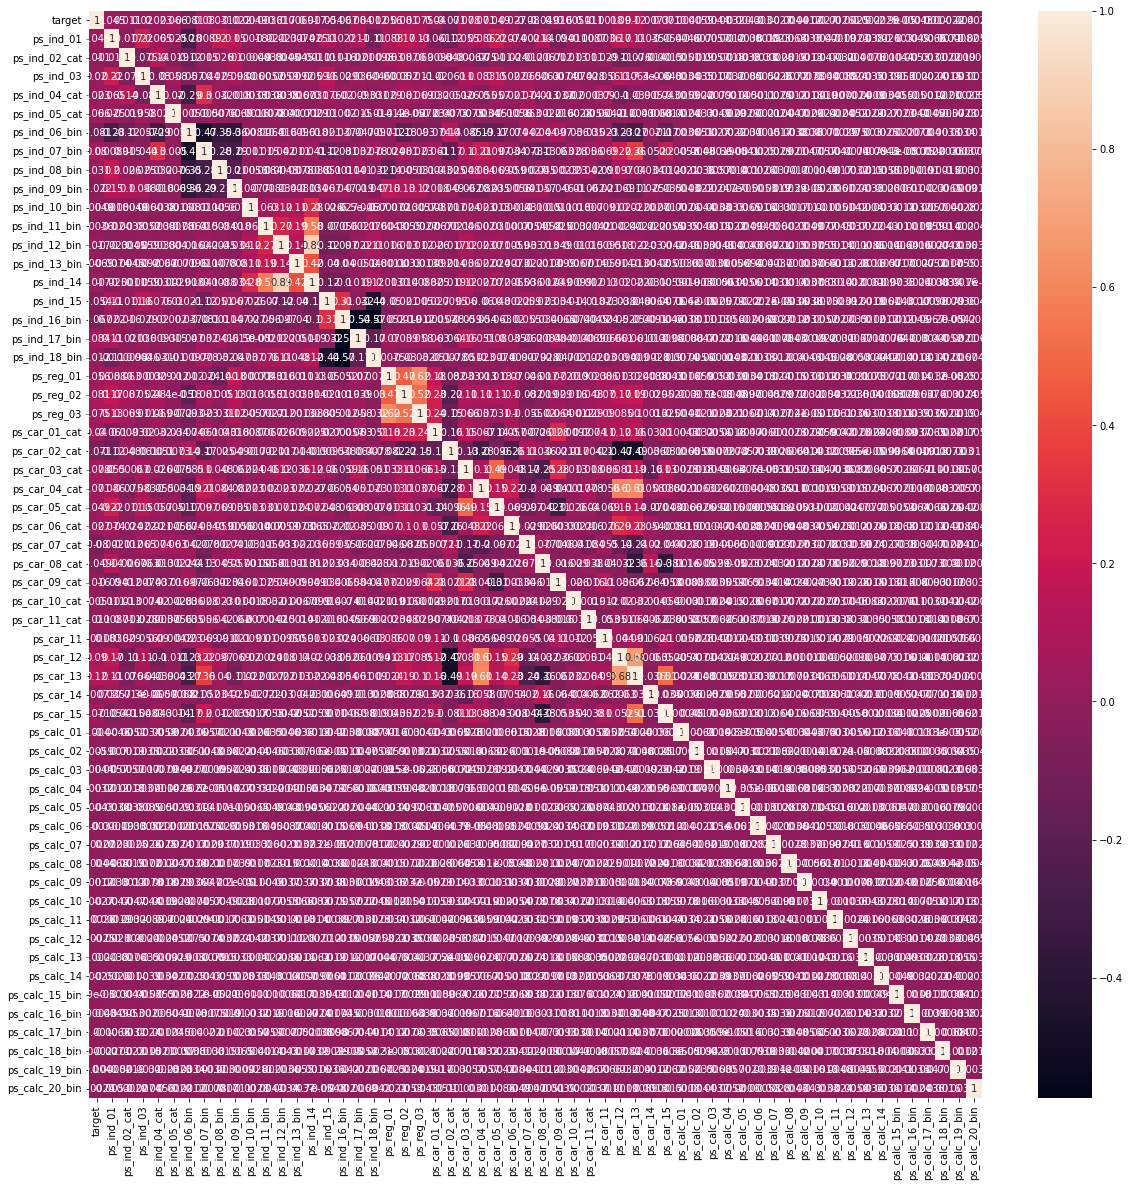

In [40]:
# df_ds[cols_Cat] = df_ds[cols_Cat].astype('category')
plt.figure(figsize=(20,20))
sns.heatmap(df_ds.corr(),annot = True)
plt.show()

<Figure size 1440x1440 with 0 Axes>

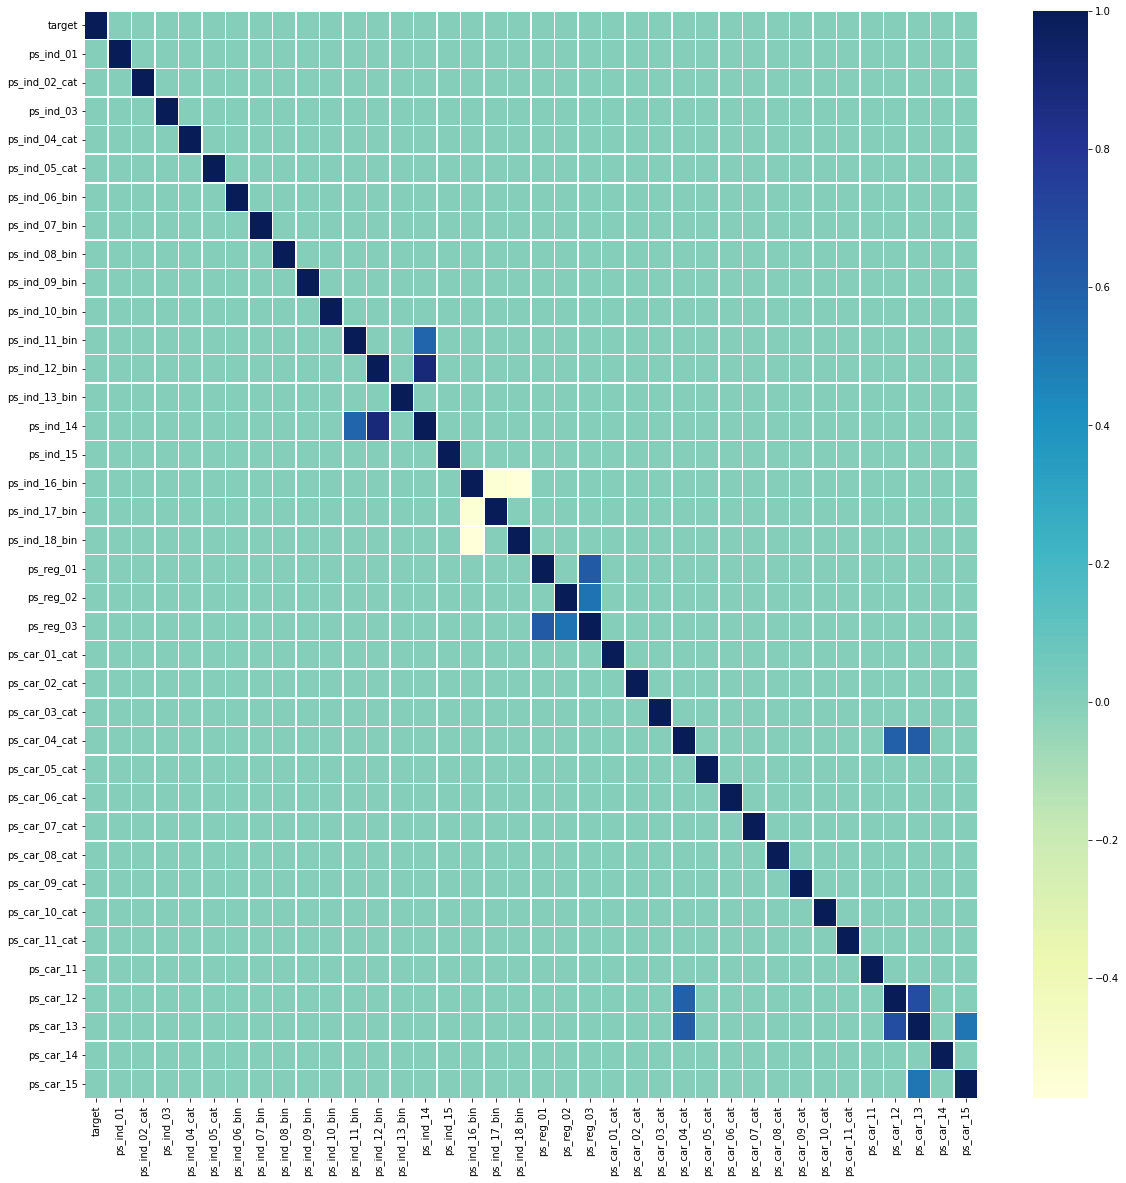

In [41]:
df_hm= df_ds.iloc[:,:38]
plt.figure(figsize=(20,20))
df_hm_corr = df_hm.corr()
df_hm_corr = df_hm_corr[(df_hm_corr>=0.5) | (df_hm_corr<=-0.5)].fillna(0)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_hm_corr,linewidths=.5, cmap="YlGnBu",ax=ax)
plt.show()

In [42]:
corr1 = df_ds.corr()
corr1.head(38)

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
target         1.000000   0.044554       0.011104   0.019944       0.022802   
ps_ind_01      0.044554   1.000000      -0.017021   0.224507       0.064825   
ps_ind_02_cat  0.011104  -0.017021       1.000000  -0.075306       0.142045   
ps_ind_03      0.019944   0.224507      -0.075306   1.000000      -0.080053   
ps_ind_04_cat  0.022802   0.064825       0.142045  -0.080053       1.000000   
ps_ind_05_cat  0.066043   0.025088      -0.018914   0.057557       0.019601   
ps_ind_06_bin -0.080814  -0.279913      -0.118349  -0.056921      -0.289617   
ps_ind_07_bin  0.080189   0.008921       0.015461  -0.044179       0.299242   
ps_ind_08_bin  0.030703   0.197414       0.026145   0.025294       0.032198   
ps_ind_09_bin -0.022259   0.146602       0.104388   0.097814      -0.017533   
ps_ind_10_bin  0.004869   0.001845       0.000485   0.006043       0.003813   
ps_ind_11_bin  0.003607  -0.020074       0.003823  -0.005154       0.003796   
ps_ind_12_bin  0.017400  -0.022673      -0.004525   0.005909       0.003792   
ps_ind_13_bin  0.006915  -0.007421       0.004495   0.009224      -0.006657   
ps_ind_14      0.016673  -0.025061      -0.001078   0.005880       0.003096   
ps_ind_15     -0.053858   0.108253      -0.010839   0.162554       0.075693   
ps_ind_16_bin -0.067327   0.022327       0.016141  -0.028611       0.020038   
ps_ind_17_bin  0.084110   0.106212      -0.021300   0.035620       0.009294   
ps_ind_18_bin  0.012190  -0.106192       0.000976   0.004627      -0.030709   
ps_reg_01      0.056064   0.088463       0.063230  -0.000298       0.028884   
ps_reg_02      0.081023   0.172888       0.086737   0.051877       0.080591   
ps_reg_03      0.074812   0.128399       0.069158   0.010578       0.069263   
ps_car_01_cat  0.040101  -0.061172       0.009301  -0.019637       0.032134   
ps_car_02_cat -0.071153  -0.122319       0.047762  -0.060632       0.005080   
ps_car_03_cat  0.077829   0.054958      -0.000670   0.100816       0.026110   
ps_car_04_cat  0.071202   0.085858      -0.075062   0.082714      -0.054708   
ps_car_05_cat  0.048672   0.219767      -0.010664   0.146049       0.057473   
ps_car_06_cat  0.027398   0.073524      -0.023833   0.021500       0.021174   
ps_car_07_cat -0.080495  -0.002108      -0.012165   0.065411       0.074384   
ps_car_08_cat -0.049418   0.138069      -0.006691   0.006289      -0.012564   
ps_car_09_cat  0.015707  -0.094170       0.012355  -0.007442      -0.036756   
ps_car_10_cat  0.005081   0.010803       0.013361  -0.007403       0.020242   
ps_car_11_cat  0.010564   0.008691       0.010500  -0.028431      -0.000372   
ps_car_11     -0.001752   0.003559       0.029035  -0.055724       0.090492   
ps_car_12      0.090046   0.170460      -0.112166   0.109520      -0.099901   
ps_car_13      0.124341   0.106031      -0.075917   0.064399      -0.039365   
ps_car_14     -0.007323   0.035483      -0.014234  -0.000007      -0.005676   
ps_car_15      0.070918  -0.054293       0.001455  -0.048010       0.043434   

               ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
target              0.066043      -0.080814       0.080189       0.030703   
ps_ind_01           0.025088      -0.279913       0.008921       0.197414   
ps_ind_02_cat      -0.018914      -0.118349       0.015461       0.026145   
ps_ind_03           0.057557      -0.056921      -0.044179       0.025294   
ps_ind_04_cat       0.019601      -0.289617       0.299242       0.032198   
ps_ind_05_cat       1.000000      -0.005105       0.005024       0.007638   
ps_ind_06_bin      -0.005105       1.000000      -0.474455      -0.346612   
ps_ind_07_bin       0.005024      -0.474455       1.000000      -0.283113   
ps_ind_08_bin       0.007638      -0.346612      -0.283113       1.000000   
ps_ind_09_bin      -0.006924      -0.359360      -0.293526      -0.214434   
ps_ind_10_bin      -0.001645      -0.008137       0.010669       0.005577   
ps_ind_11_b

##INFERENCE: HeatMap Correlation
1. ps_ind_14 vs ps_ind_12_bin - 0.89 (strong Correlation).

2. Also additionaly have considerable correlations

  a) ps_ind_14 vs ps_ind_11_bin - 0.58

  b) ps_ind_14 vs ps_ind_13_bin - 0.42

3. ps_reg_01 vs ps_reg_03 - 0.62

   ps_reg_01 vs ps_re_02 - 0.47

4. ps_reg_02 vs ps_reg_03 - 0.52

5. ps_car_12 vs ps_car_13 - 0.68

6. ps_car_15 vs ps_car_13 - 0.51

7. ps_ind_15 vs ps_ind_18_bin - 0.44


#I - EDA Questionaire

## 1. Write at least 3 important inferences from the data above

1. The data are fully masked couldn't able to understand the context of the features, except target column, where the policy holder indicated as claimed or not, viz 1 or 0.
2. Mentioned that the feature names indicating by postfixes belongs to same groups. Viz indices(_ind),  cardinal(_car), calculated(_calc) & Interval /continuous(_reg) and further post fixes as binary(_bin), categorical(_cat),and the remaining ordinal or continuous variables. However this may be verified/cross checked by clustering methods(K Means or Dendrogram Unsupervised Learning Methods)
3. However, based on EDA, Identified some of the Misplaced Features (mentioned earlier).
4. Except the features [ps_reg_03, ps_car_12, ps_car_13, ps_car_14, car_15] preferably continuous(Regressive Type). Mostly the Claim Amount related lies in the above features.
5. And the remaining all are belonging to Ordinal/Categorical/Binary types
6. The features ps_calc_11, ps_ind_03, ps_calc_14, ps_calc_05 probably represents the data for 20 years, 12 months, 7 days of week & 24 hrs of a day respectively.
7. The feature 'id' is Nominal type. Hence it can be ignored.

## 2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?

In [43]:
print(df_org['target'].value_counts())
print('Percent of targeted Value',21694/(21694+573518) * 100)

0    573518
1     21694
Name: target, dtype: int64
Percent of targeted Value 3.6447517859182947


##INFERENCE: Imbalance in Targeted Value 

1. Extremely Imbalanced. The Cailmed target Percent is 3.65% only. 
2. Hence balancing has to be caried out atleast in the ratio of 30 : 70, inorder to get appropriate F1 Score and related metrics.

## 3. How many categorical features are there?
## 4. How many binary features are there?

In [44]:
print(l_cat)
len(l_cat)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']


14

In [45]:
print(l_bin)
len(l_bin)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']


17

In [46]:
print(l_reg)
len(l_reg)

['ps_reg_01', 'ps_reg_02', 'ps_reg_03']


3

In [47]:
print(l_ord)
len(l_ord)

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']


23

1. Strictly speaking, all the features are coming under numeric only. 

2. However based on the nomenclature and instructions given, certain features grouped under categorical variables.
3. l_cat(14 nos) + l_bin(17 nos) can be grouped as categorical Variables

## 5. Write inferences from data on interval variables.

1. As per the instructions, the non available of Postfix(cat or bin) can be considered as continuous or ordinal suitably. Here we can consider both regressive and ordinal as interval Varibles.Totaly - 26 nos.
2. l_reg(3 nos) + l_ord(23 nos) can be grouped as Interval Variables
3. Based on EDA, the real regressive/continuous features are [ps_reg_03, ps_car_12, ps_car_13, ps_car_14, car_15]. Mostly the Claim Amount related lies in these features. Totally - 5 Nos.
4. And the remaining can be classfied as Ranked / Categorical Numeric / ordinal.

## 6. Write inferences from data on ordinal variables.
1. And the remaining 21 Varibles are ordinal numeric type

2. Might covers up the date and time if distinct values matches with months hours and days ps_calc_14 -> 24 hrs, ps_ind_03 -> 12 months, ps_calc_05 -> 7 days of week and ps_calc_11 -> 20 years of data

## 7. Write inferences from data on binary variables.

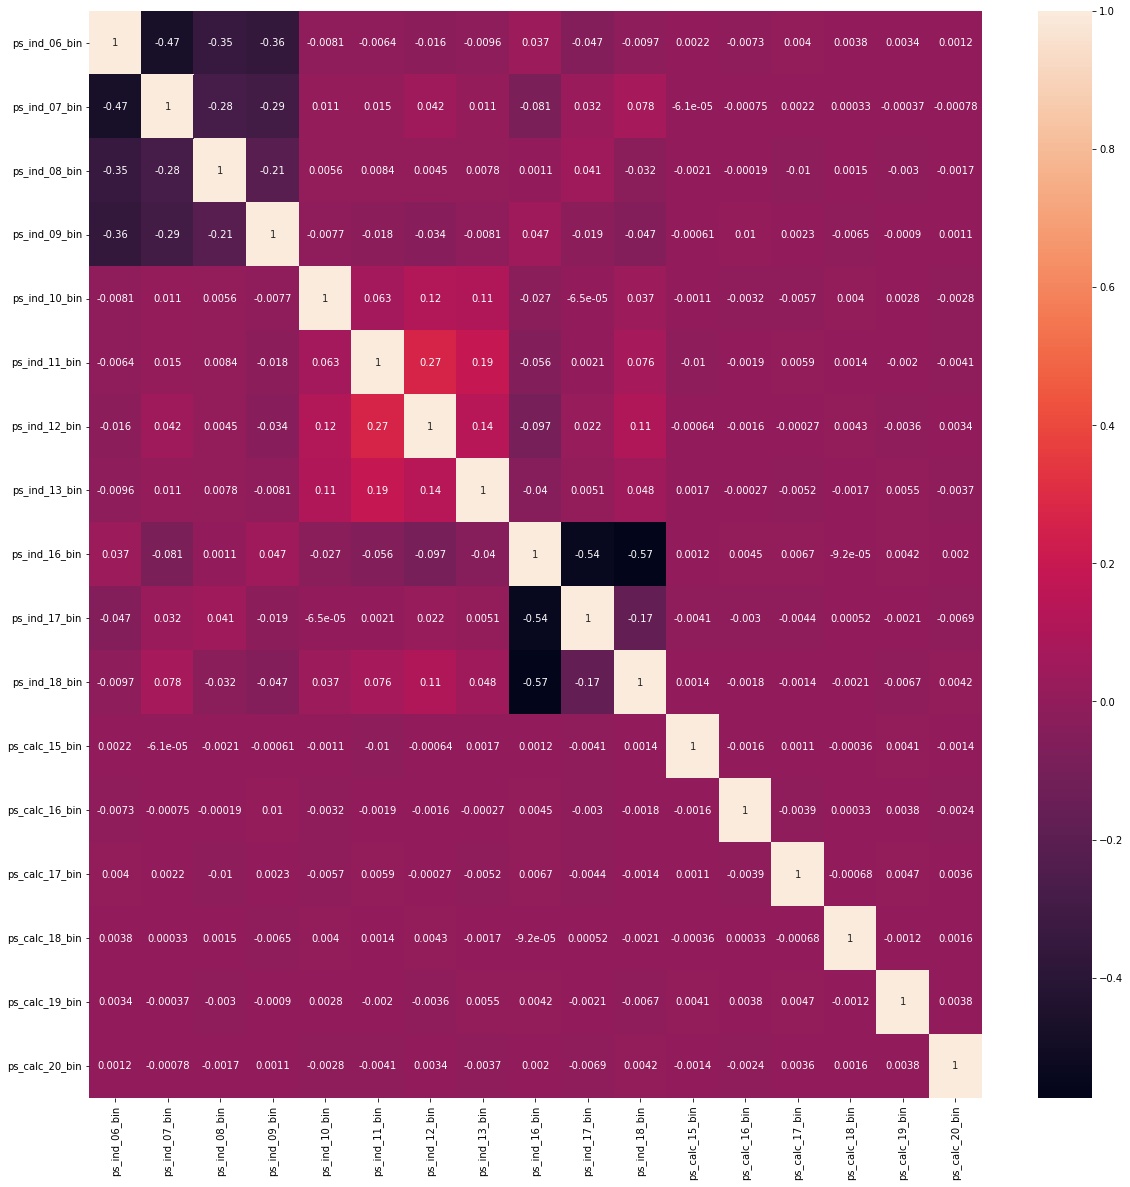

In [49]:
plt.figure(figsize=(20,20))
sns.heatmap(df_ds[l_bin].corr(),annot = True)
plt.show()

## INFERENCE: Binary Feature Correlations

1. There is no much findings. Since the correlation map mostly shows no correlations among binary variables.
2. Except ps_ind_16_bin, ps_ind_17_bin, ps_ind_18_bin have the correlations just above 0.5.
3. And ps_ind_06_bin, ps_ind_07_bin, ps_ind_08_bin, ps_ind_06_bin have correlations below 0.5 among themselves.
4. None of them have expected correlation towards target value

## 8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance

In [50]:
df['target'].value_counts()

0    573518
1     21694
Name: target, dtype: int64

1. Extremely Imbalanced. 
2. The Calimed data Percent is given 3.65% only. Hence balancing carried out in the ratio of 30 : 70 inorder to get appropriate F1 Score and related metrics.
3. Already Downsampling has done. Refer DataFrame of df_ds

## 9. What should be the preferred way in this case to balance the data?
1. Since we had nearly 6 lacs data. Handling with oversampling be much more difficult on computation in certain models (knn..) 
2. The prefered way is Down Sampling or Undersampling. If required further upsampling can be done by SMOTE for targeted value = 1 for better support.

## 10. How many training records are there after achieving a balance of 12%?
1. Calculation done already while downsampling. Ref df_ds DataFrame
2. Approximatly it would be 50000 data for not_claimed target

## 11. Which are the top two features in terms of missing values?
## 12. In total, how many features have missing values?

In [51]:
dict_miss = {'features': [], 'missing_nos': [], 'missing_percent': []}
for i in df.columns:
  # print(len(df[(df[i].values == -1)]))
  dict_miss['features'].append(i)
  dict_miss['missing_nos'].append(len(df[(df[i].values == -1)]))
  dict_miss['missing_percent'].append(len(df[(df[i].values == -1)])*100/len(df))

pd.DataFrame(dict_miss).sort_values(by = 'missing_percent', ascending = False).head(15)

features  missing_nos  missing_percent
24  ps_car_03_cat       411231        69.089837
26  ps_car_05_cat       266551        44.782531
21      ps_reg_03       107772        18.106490
36      ps_car_14        42620         7.160474
28  ps_car_07_cat        11489         1.930237
5   ps_ind_05_cat         5809         0.975955
30  ps_car_09_cat          569         0.095596
2   ps_ind_02_cat          216         0.036290
22  ps_car_01_cat          107         0.017977
4   ps_ind_04_cat           83         0.013945
33      ps_car_11            5         0.000840
34      ps_car_12            1         0.000168
38     ps_calc_01            0         0.000000
39     ps_calc_02            0         0.000000
42     ps_calc_05            0         0.000000

## INFERENCE: Missing Values

1. Missing Values found in 12 Features
2. Missing percents are ps_car_03_cat -> 69%, ps_car_05 -> 44%, ps_reg_03 -> 18%, ps_car_14 -> 7% predominantly. While remaining features are lying less than 2%.
3. So better remove the incoherent Features contains predominantly posses missing values.

## 13. What steps should be taken to handle the missing data?

## A. Simple Imputation

In [52]:
df_ds.replace(-1, np.nan, inplace = True)
df_simpI = df_ds.copy()
for i in cols_Cat:
  df_simpI[i]=df_ds[i].fillna(df_ds[i].mode()[0])
for i in cols_Intv:
  df_simpI[i]=df_ds[i].fillna(df_ds[i].mean())

In [53]:
df_simpI

target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0           0          1            1.0          7            0.0   
1           1          1            1.0          2            0.0   
2           1          0            1.0          2            1.0   
3           0          0            1.0          7            0.0   
4           1          0            2.0          0            1.0   
...       ...        ...            ...        ...            ...   
71689       0          0            2.0          1            0.0   
71690       1          1            2.0          1            0.0   
71691       0          3            2.0          1            1.0   
71692       0          1            1.0          3            0.0   
71693       0          5            2.0          3            1.0   

       ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                0.0              0              0              1   
1                0.0              0              1              0   
2                0.0              1              0              0   
3                0.0              1              0              0   
4                4.0              1              0              0   
...              ...            ...            ...            ...   
71689            0.0              1              0              0   
71690            0.0              0              0              1   
71691            0.0              1              0              0   
71692            0.0              1              0              0   
71693            0.0              0              0              1   

       ps_ind_09_bin  ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  \
0                  0              0              0              0   
1                  0              0              0              0   
2                  0              0              0              0   
3                  0              0              0              0   
4                  0              0              0              0   
...              ...            ...            ...            ...   
71689              0              0              0              0   
71690              0              0              0              0   
71691              0              0              0              0   
71692              0              0              0              0   
71693              0              0              0              0   

       ps_ind_13_bin  ps_ind_14  ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  \
0                  0          0          3              0              0   
1                  0          0          4              0              0   
2                  0          0          8              1              0   
3                  0          0         13              1              0   
4                  0          0          8              1              0   
...              ...        ...        ...            ...            ...   
71689              0          0          9              1              0   
71690              0          0         13              1              0   
71691              0          0         10              1              0   
71692              0          0          0              1              0   
71693              0          0         12              1              0   

       ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  ps_car_01_cat  \
0                  1        0.8        0.4   0.766078           11.0   
1                  1        0.9        1.4   2.316652           11.0   
2                  0        0.9        0.3   0.402337            7.0   
3                  0        0.1        0.2   0.912376            4.0   
4                  0        0.2        0.3   0.912376            4.0   
...              ...        ...        ...        ...            ...   
71689              0        0.1        0.2   0.912376            7.0   
71690              0        0.6

In [54]:
dict_vs = {'feature':[], 'unique_values': [],  'nunique':[], 'min': [], 'max': [], 'mean':[]} 
for col in df_simpI.columns:
    dict_vs['feature'].append(col)
    dict_vs['nunique'].append(df_simpI[col].nunique())
    dict_vs['unique_values'].append(df_simpI[col].unique())
    dict_vs['min'].append(df_simpI[col].min()) # Since Numeric Changed to Category
    dict_vs['max'].append(df_simpI[col].max())
    dict_vs['mean'].append(df_simpI[col].mean())

pd.DataFrame(dict_vs)

feature                                      unique_values  \
0           target                                             [0, 1]   
1        ps_ind_01                           [1, 0, 2, 5, 3, 6, 7, 4]   
2    ps_ind_02_cat                               [1.0, 2.0, 3.0, 4.0]   
3        ps_ind_03             [7, 2, 0, 3, 1, 5, 6, 10, 8, 4, 11, 9]   
4    ps_ind_04_cat                                         [0.0, 1.0]   
5    ps_ind_05_cat                [0.0, 4.0, 6.0, 2.0, 3.0, 1.0, 5.0]   
6    ps_ind_06_bin                                             [0, 1]   
7    ps_ind_07_bin                                             [0, 1]   
8    ps_ind_08_bin                                             [1, 0]   
9    ps_ind_09_bin                                             [0, 1]   
10   ps_ind_10_bin                                             [0, 1]   
11   ps_ind_11_bin                                             [0, 1]   
12   ps_ind_12_bin                                             [0, 1]   
13   ps_ind_13_bin                                             [0, 1]   
14       ps_ind_14                                    [0, 1, 2, 3, 4]   
15       ps_ind_15     [3, 4, 8, 13, 12, 11, 7, 5, 1, 0, 6, 2, 10, 9]   
16   ps_ind_16_bin                                             [0, 1]   
17   ps_ind_17_bin                                             [0, 1]   
18   ps_ind_18_bin                                             [1, 0]   
19       ps_reg_01  [0.8, 0.9, 0.1, 0.2, 0.3, 0.6, 0.7, 0.0, 0.4, ...   
20       ps_reg_02  [0.4, 1.4, 0.3, 0.2, 0.0, 0.1, 1.5, 0.9, 0.8, ...   
21       ps_reg_03  [0.766077672, 2.316651679, 0.402336924, 0.9123...   
22   ps_car_01_cat  [11.0, 7.0, 4.0, 6.0, 10.0, 5.0, 8.0, 0.0, 9.0...   
23   ps_car_02_cat                                             [1, 0]   
24   ps_car_03_cat                                         [1.0, 0.0]   
25   ps_car_04_cat                     [0, 1, 8, 2, 9, 4, 6, 3, 5, 7]   
26   ps_car_05_cat                                         [1.0, 0.0]   
27   ps_car_06_cat  [11, 14, 1, 6, 10, 0, 4, 3, 9, 16, 13, 7, 15, ...   
28   ps_car_07_cat                                         [1.0, 0.0]   
29   ps_car_08_cat                                             [1, 0]   
30   ps_car_09_cat                          [2.0, 0.0, 1.0, 3.0, 4.0]   
31   ps_car_10_cat                                          [1, 0, 2]   
32   ps_car_11_cat  [19, 104, 64, 24, 38, 89, 82, 87, 68, 76, 23, ...   
33       ps_car_11                                       [3, 2, 1, 0]   
34       ps_car_12  [0.316227766, 0.447213595, 0.315277655, 0.5291...   
35       ps_car_13  [0.618816519, 1.458184369, 0.464593486, 0.8947...   
36       ps_car_14  [0.388715835, 0.39025632600000004, 0.361247837...   
37       ps_car_15  [2.449489743, 3.6055512760000004, 0.0, 1.41421...   
38      ps_calc_01  [0.3, 0.7, 0.5, 0.8, 0.1, 0.6, 0.4, 0.9, 0.0, ...   
39      ps_calc_02  [0.1, 0.8, 0.3, 0.7, 0.4, 0.2, 0.5, 0.9, 0.0, ...   
40      ps_calc_03  [0.3, 0.8, 0.2, 0.6, 0.1, 0.5, 0.9, 0.0, 0.4, ...   
41      ps_calc_04                                 [2, 4, 1, 3, 0, 5]   
42      ps_calc_05                              [1, 2, 0, 3, 4, 5, 6]   
43      ps_calc_06                       [9, 8, 10, 5, 7, 6, 4, 3, 2]   
44      ps_calc_07                     [5, 2, 4, 3, 1, 6, 0, 7, 8, 9]   
45      ps_calc_08               [8, 9, 5, 10, 11, 12, 7, 6, 4, 3, 2]   
46      ps_calc_09                           [1, 2, 4, 3, 0, 5, 6, 7]   
47      ps_calc_10  [7, 11, 10, 9, 5, 6, 12, 8, 13, 14, 3, 4, 1, 1...   
48      ps_calc_11  [3, 10, 6, 5, 9, 13, 4, 2, 7, 8, 12, 11, 1, 0,...   
49      ps_calc_12                        [1, 5, 3, 4, 2, 0, 6, 7, 8]   
50      ps_calc_13     [1, 0, 4, 8, 2, 3, 5, 6, 7, 9, 11, 10, 12, 13]   
51      ps_calc_14  [9, 6, 11, 4, 8, 14, 7, 12, 16, 10, 5, 13, 1, ...   
52  ps_calc_15_bin                                             [0, 1]   
53  ps_calc_16_bin                                             [1, 0]

In [55]:
X1 = df_simpI.drop('target', axis = 1)
y1 = df_simpI['target']
X0_train, X0_test, y0_train, y0_test = tts(X1, y1, test_size = 0.2, stratify = y1)

In [56]:
X0_train

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
19655          0            1.0          6            0.0            0.0   
16144          0            2.0          0            1.0            0.0   
18359          1            1.0          2            0.0            0.0   
37499          5            1.0          9            0.0            0.0   
44635          1            3.0          7            0.0            0.0   
...          ...            ...        ...            ...            ...   
33233          0            1.0          6            1.0            0.0   
11106          5            1.0          3            1.0            0.0   
27648          2            1.0          5            0.0            0.0   
57303          0            1.0          8            0.0            0.0   
64459          7            1.0          7            1.0            0.0   

       ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
19655              0              0              1              0   
16144              0              1              0              0   
18359              1              0              0              0   
37499              0              0              1              0   
44635              1              0              0              0   
...              ...            ...            ...            ...   
33233              0              0              1              0   
11106              0              0              1              0   
27648              1              0              0              0   
57303              1              0              0              0   
64459              0              1              0              0   

       ps_ind_10_bin  ps_ind_11_bin  ps_ind_12_bin  ps_ind_13_bin  ps_ind_14  \
19655              0              0              0              0          0   
16144              0              0              0              0          0   
18359              0              0              0              0          0   
37499              0              0              0              0          0   
44635              0              0              0              0          0   
...              ...            ...            ...            ...        ...   
33233              0              0              0              0          0   
11106              0              0              0              0          0   
27648              0              0              0              0          0   
57303              0              0              0              0          0   
64459              0              0              0              0          0   

       ps_ind_15  ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  \
19655          7              0              0              0        0.6   
16144         10              0              0              0        0.9   
18359          9              1              0              0        0.3   
37499         10              1              0              0        0.9   
44635         10              1              0              0        0.9   
...          ...            ...            ...            ...        ...   
33233         13              1              0              0        0.6   
11106          6              1              0              0        0.4   
27648          4              1              0              0        0.8   
57303          2              0              1              0        0.3   
64459          5              0              1              0        0.9   

       ps_reg_02  ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_03_cat  \
19655        0.3   0.637377            8.0              1            1.0   
16144        0.8   1.698161           11.0              0            1.0   
18359        0.3   0.912376            6.0              1            1.0   
37499        1.6   1.801041            3.0              1            1.0   
44635      

## 14. Which interval variables have strong correlation?
## 15. What's the level of correlation among ordinal features?

1. ps_ind_14 vs ps_ind_12_bin -> 0.89 strong Correlation.

2. Also additionaly have considerable correlations

  a) ps_ind_14 vs ps_ind_11_bin -> 0.58

  b) ps_ind_14 vs ps_ind_13_bin -> 0.42

3. ps_reg_01 vs ps_reg_03 -> 0.62 (Interval)

   ps_reg_01 vs ps_reg_02 -> 0.47 (Interval)

4. ps_reg_02 vs ps_reg_03 -> 0.52 (Interval)

5. ps_car_12 vs ps_car_13 -> 0.68 (Interval)

6. ps_car_15 vs ps_car_13 -> 0.51 (Interval)

7. ps_ind_15 vs ps_ind_18_bin -> 0.44

##16. Implement Hot Encoding for categorical features


In [57]:
X1[cols_Cat] = X1[cols_Cat].astype('category')

## Feature Engineering - Columns to drop

In [58]:
high_miss = ['ps_car_03_cat', 'ps_car_05_cat']
multi_colinear = ['ps_ind_12_bin']

X1 = X1.drop(high_miss+multi_colinear, axis = 1)
X1

ps_ind_01 ps_ind_02_cat  ps_ind_03 ps_ind_04_cat ps_ind_05_cat  \
0              1           1.0          7           0.0           0.0   
1              1           1.0          2           0.0           0.0   
2              0           1.0          2           1.0           0.0   
3              0           1.0          7           0.0           0.0   
4              0           2.0          0           1.0           4.0   
...          ...           ...        ...           ...           ...   
71689          0           2.0          1           0.0           0.0   
71690          1           2.0          1           0.0           0.0   
71691          3           2.0          1           1.0           0.0   
71692          1           1.0          3           0.0           0.0   
71693          5           2.0          3           1.0           0.0   

      ps_ind_06_bin ps_ind_07_bin ps_ind_08_bin ps_ind_09_bin ps_ind_10_bin  \
0                 0             0             1             0             0   
1                 0             1             0             0             0   
2                 1             0             0             0             0   
3                 1             0             0             0             0   
4                 1             0             0             0             0   
...             ...           ...           ...           ...           ...   
71689             1             0             0             0             0   
71690             0             0             1             0             0   
71691             1             0             0             0             0   
71692             1             0             0             0             0   
71693             0             0             1             0             0   

      ps_ind_11_bin ps_ind_13_bin  ps_ind_14  ps_ind_15 ps_ind_16_bin  \
0                 0             0          0          3             0   
1                 0             0          0          4             0   
2                 0             0          0          8             1   
3                 0             0          0         13             1   
4                 0             0          0          8             1   
...             ...           ...        ...        ...           ...   
71689             0             0          0          9             1   
71690             0             0          0         13             1   
71691             0             0          0         10             1   
71692             0             0          0          0             1   
71693             0             0          0         12             1   

      ps_ind_17_bin ps_ind_18_bin  ps_reg_01  ps_reg_02  ps_reg_03  \
0                 0             1        0.8        0.4   0.766078   
1                 0             1        0.9        1.4   2.316652   
2                 0             0        0.9        0.3   0.402337   
3                 0             0        0.1        0.2   0.912376   
4                 0             0        0.2        0.3   0.912376   
...             ...           ...        ...        ...        ...   
71689             0             0        0.1        0.2   0.912376   
71690             0             0        0.6        0.4   1.095160   
71691             0             0        0.6        0.3   0.766893   
71692             0             0        0.9        0.3   0.912757   
71693             0             0        0.9        0.4   0.698212   

      ps_car_01_cat ps_car_02_cat ps_car_04_cat ps_car_06_cat ps_car_07_cat  \
0              11.0             1             0            11           1.0   
1              11.0             0             1            14           1.0   
2               7.0             1             0             1           1.0   
3               4.0             1             8            11           1.0   
4               4.0             0             0             6       

In [59]:
cols_Cat.remove('ps_ind_12_bin')
cols_Cat.remove('ps_car_05_cat')
cols_Cat.remove('ps_car_03_cat')
len(cols_Cat)

28

In [60]:
X1_enc = X1.drop(cols_Cat, axis = 1)
enc = pd.get_dummies(X1[cols_Cat],drop_first=True)
enc

ps_ind_02_cat_2.0  ps_ind_02_cat_3.0  ps_ind_02_cat_4.0  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      1                  0                  0   
...                  ...                ...                ...   
71689                  1                  0                  0   
71690                  1                  0                  0   
71691                  1                  0                  0   
71692                  0                  0                  0   
71693                  1                  0                  0   

       ps_ind_04_cat_1.0  ps_ind_05_cat_1.0  ps_ind_05_cat_2.0  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      1                  0                  0   
3                      0                  0                  0   
4                      1                  0                  0   
...                  ...                ...                ...   
71689                  0                  0                  0   
71690                  0                  0                  0   
71691                  1                  0                  0   
71692                  0                  0                  0   
71693                  1                  0                  0   

       ps_ind_05_cat_3.0  ps_ind_05_cat_4.0  ps_ind_05_cat_5.0  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  1                  0   
...                  ...                ...                ...   
71689                  0                  0                  0   
71690                  0                  0                  0   
71691                  0                  0                  0   
71692                  0                  0                  0   
71693                  0                  0                  0   

       ps_ind_05_cat_6.0  ps_car_01_cat_1.0  ps_car_01_cat_2.0  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  0                  0   
...                  ...                ...                ...   
71689                  0                  0                  0   
71690                  0                  0                  0   
71691                  0                  0                  0   
71692                  0                  0                  0   
71693                  0                  0                  0   

       ps_car_01_cat_3.0  ps_car_01_cat_4.0  ps_car_01_cat_5.0  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  1                  0   
4                      0                  1                  0   
...                  ...                ...                ...   
71689                  0                  0                  0   
71690                  0                  0                  0   
71691                  0                  0                  1   
71692                  0                  0                  0   
71693                  0                  0                  0   

       ps_car_01_cat_6.0  ps_car_01_cat_7.

In [62]:
X1_enc = pd.concat([X1,enc], axis = 1)
X1_enc=X1_enc.drop(cols_Cat,axis=1)
X1_enc

ps_ind_01  ps_ind_03  ps_ind_14  ps_ind_15  ps_reg_01  ps_reg_02  \
0              1          7          0          3        0.8        0.4   
1              1          2          0          4        0.9        1.4   
2              0          2          0          8        0.9        0.3   
3              0          7          0         13        0.1        0.2   
4              0          0          0          8        0.2        0.3   
...          ...        ...        ...        ...        ...        ...   
71689          0          1          0          9        0.1        0.2   
71690          1          1          0         13        0.6        0.4   
71691          3          1          0         10        0.6        0.3   
71692          1          3          0          0        0.9        0.3   
71693          5          3          0         12        0.9        0.4   

       ps_reg_03  ps_car_11  ps_car_12  ps_car_13  ps_car_14  ps_car_15  \
0       0.766078          3   0.316228   0.618817   0.388716   2.449490   
1       2.316652          2   0.447214   1.458184   0.390256   3.605551   
2       0.402337          3   0.315278   0.464593   0.361248   0.000000   
3       0.912376          2   0.529150   0.894751   0.527731   1.414214   
4       0.912376          2   0.447214   0.720265   0.441588   2.645751   
...          ...        ...        ...        ...        ...        ...   
71689   0.912376          2   0.316228   0.601067   0.303315   2.828427   
71690   1.095160          2   0.374166   0.752558   0.328634   3.464102   
71691   0.766893          3   0.374166   0.681773   0.320468   3.000000   
71692   0.912757          2   0.316228   0.694206   0.368782   3.464102   
71693   0.698212          3   0.374166   0.764434   0.384968   3.162278   

       ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  ps_calc_06  \
0             0.3         0.1         0.3           2           1           9   
1             0.7         0.8         0.8           2           2           8   
2             0.7         0.3         0.2           2           2           8   
3             0.5         0.7         0.6           2           2           9   
4             0.8         0.4         0.1           2           2          10   
...           ...         ...         ...         ...         ...         ...   
71689         0.1         0.1         0.3           3           2           9   
71690         0.2         0.6         0.3           1           1           8   
71691         0.7         0.7         0.8           3           3           8   
71692         0.2         0.1         0.4           2           1           9   
71693         0.0         0.7         0.0           4           0           9   

       ps_calc_07  ps_calc_08  ps_calc_09  ps_calc_10  ps_calc_11  ps_calc_12  \
0               5           8           1           7           3           1   
1               2           9           1          11           3           5   
2               2           5           2          10          10           3   
3               4          10           4           9           6           4   
4               3           9           2           5           3           2   
...           ...         ...         ...         ...         ...         ...   
71689           3           9           1           9           3           1   
71690           2          11           0          13           7           2   
71691           2          11           3          10           6           0   
71692           1          11           3           5           7           1   
71693           4           9           2          11           4           1   

       ps_calc_13  ps_calc_14  ps_ind_02_cat_2.0  ps_ind_02_cat_3.0  \
0               1           9                  0                  0   
1               0           6                  0                  0   
2               1          11                 

## 17. In nominal and interval features, which features are suitable for StandardScaler?

1. Interval Features - Continuous Variable only suitable for Standard Scaler.
2. Nominal is for categorical Type only. 

In [63]:
X1_train, X1_test, y1_train, y1_test = tts(X1_enc,y1,test_size = 0.2, random_state = 81 , stratify = y1)

In [64]:
X1_train

ps_ind_01  ps_ind_03  ps_ind_14  ps_ind_15  ps_reg_01  ps_reg_02  \
28248          3          8          0          6        0.1        0.2   
53873          0          8          0          0        0.2        0.4   
31530          5          2          0         11        0.7        0.2   
22067          0          4          0          8        0.7        0.3   
66858          7          6          0          8        0.4        0.0   
...          ...        ...        ...        ...        ...        ...   
59299          4         10          0          9        0.5        0.3   
60187          1          5          0          7        0.4        0.4   
33975          0          1          0          5        0.1        0.2   
53503          1          4          0          8        0.4        0.0   
23162          0          1          0          0        0.6        0.3   

       ps_reg_03  ps_car_11  ps_car_12  ps_car_13  ps_car_14  ps_car_15  \
28248   0.912376          2   0.529150   0.998573   0.536190   2.236068   
53873   0.912376          3   0.374166   0.687296   0.390768   3.000000   
31530   0.557337          1   0.316228   0.758941   0.371080   3.605551   
22067   0.664737          3   0.447214   1.164772   0.409390   3.605551   
66858   1.167529          3   0.447214   1.389511   0.497594   3.464102   
...          ...        ...        ...        ...        ...        ...   
59299   0.656696          3   0.424264   0.690445   0.412916   2.645751   
60187   0.777817          3   0.399500   0.711462   0.407431   2.236068   
33975   0.912376          2   0.374166   0.880306   0.330757   3.605551   
53503   0.665207          3   0.447214   0.685415   0.375558   1.414214   
23162   0.691918          2   0.565685   1.319928   0.518652   3.162278   

       ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  ps_calc_06  \
28248         0.9         0.0         0.1           1           1          10   
53873         0.9         0.7         0.8           2           1           5   
31530         0.4         0.5         0.5           3           2           7   
22067         0.0         0.2         0.0           2           2           8   
66858         0.9         0.3         0.3           0           2           5   
...           ...         ...         ...         ...         ...         ...   
59299         0.0         0.5         0.5           3           3           8   
60187         0.6         0.0         0.7           0           2           7   
33975         0.0         0.5         0.5           0           1          10   
53503         0.0         0.8         0.6           2           4           7   
23162         0.2         0.1         0.8           1           1           8   

       ps_calc_07  ps_calc_08  ps_calc_09  ps_calc_10  ps_calc_11  ps_calc_12  \
28248           4           9           3          15           6           1   
53873           3          10           2          14           8           0   
31530           4           9           1           5           4           0   
22067           3           9           2           6           5           1   
66858           3          10           3           9           6           1   
...           ...         ...         ...         ...         ...         ...   
59299           3          10           2          10           4           4   
60187           4           6           4           6           7           0   
33975           5          10           2           3           6           1   
53503           5           8           1           8           6           0   
23162           0           9           3           9           3           1   

       ps_calc_13  ps_calc_14  ps_ind_02_cat_2.0  ps_ind_02_cat_3.0  \
28248           3           4                  0                  0   
53873           4          12                  0                  0   
31530           3           9                 

In [65]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [66]:
X1_train = ss.fit_transform(X1_train)
X1_test = ss.transform(X1_test)

## 18. Summarize the learnings of ED

### LEARNINGS
1. Though all the features appeared to be categorized, some of the features are need to be regrouped. Especailly from interval variables are needed to be regrouped based on Visual EDA and Data Distribution (Discrete or Continous).
2. Data is not balanced. Highly imbalanced.
3. As per Heatmap, None of the features are not having significant correlation or variation with Targetted Value = 1. So Indentifying the pattern behind this is very difficult.
4. Only some of the feature showing correlations among them.
5. Missing values noticed significantly in two features.
6. Only few features showing variations towards target. But most of the features are very inert.

# II MODELING

In [67]:
lr = LogisticRegression(penalty='l2', 
                        dual=False, 
                        tol=0.0001, 
                        C=1.0, 
                        fit_intercept=True, 
                        intercept_scaling=1, 
                        class_weight=None, 
                        random_state=99, 
                        solver='lbfgs', 
                        max_iter=100, 
                        multi_class='auto', 
                        verbose=0, 
                        warm_start=False, 
                        n_jobs=None, 
                        l1_ratio=None)
lr.fit(X1_train, y1_train)
y1_pred = lr.predict(X1_test)
print(cr(y1_test, y1_pred))
print(cm(y1_test, y1_pred))
print(ras(y1_test, y1_pred))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82     10000
           1       0.51      0.08      0.14      4339

    accuracy                           0.70     14339
   macro avg       0.61      0.52      0.48     14339
weighted avg       0.65      0.70      0.61     14339

[[9657  343]
 [3982  357]]
0.5239885111776907


##1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?

No. Our requirement is all about targeted = 1 (claim person prediction). Actually the recall and precision 0.08 and 0.51. Also f1-Score is very poor 0.14

##2. Why do you think f1-score is 0.0?
May be the feature data is not able to linearly separable. Most of the categorical and binary features are not showing any variation towards targeted value based on EDA. 
Probably support for the target (30%) is found marginal. Hence it can be increased to 50% also.


##3. What is the precision and recall score for the model?
Actually the recall and precision 0.08 and 0.51. Also f1-Score is very poor 0.14

## 4. What is the most important inference you can draw from the result?

## Inference
1. F1 score for the targeted value is very poor (0.14). Also recall value for the targeted value is worst. 
2. Also the features for linearly separable for Logistic Regression may not support favourably. Something simillary to XOR gate - Means something the binary features contradict with targeted binary values for linear separation.
3. Most of the feature belongs to categorical as well binary variables. However Logistic Regression works mainly for regressive variable only. However less than half of the features only belong to Regressive. Feature Engineering on categorisation to be done.
4. Some of the Binary Features may be compensated or to be removed. Based of features importances certain features of categorical and binary may be removed for better score in Logistic Regression.

##5. What is the accuracy score and f1-score for the improved Logistic Regression model?

In [68]:
cols_Reg2 = ['ps_reg_03','ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15']
cols_Cat2 = list(df_org.columns)
cols_Cat2.remove('ps_reg_03')
cols_Cat2.remove('ps_car_12')
cols_Cat2.remove('ps_car_13')
cols_Cat2.remove('ps_car_14')
cols_Cat2.remove('ps_car_15')
cols_Cat2.remove('id')
cols_Cat2.remove('target')
len(cols_Cat2)

52

## Simple Imputed & SMOTE

In [69]:
df_simpI[cols_Cat2] = df_simpI[cols_Cat2].astype('int32')

In [70]:
X2 = df_simpI.drop('target', axis = 1)
y2 = df_simpI['target']

In [71]:
# X2_SS = ss.fit_transform(X2) # given low F1 score - < 60%

In [72]:
high_miss = ['ps_car_03_cat', 'ps_car_05_cat']
multi_colinear = ['ps_ind_12_bin']
X2 = X2.drop(high_miss+multi_colinear, axis = 1)

In [73]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_SM2,y_SM2 = sm.fit_resample(X2,y2)

In [74]:
X2_train, X2_test, y2_train, y2_test = tts(X_SM2, y_SM2, test_size = 0.2, stratify = y_SM2)

In [75]:
lr = LogisticRegression(penalty='l2', 
                        dual=False, 
                        tol=0.01, 
                        C=1.0, 
                        fit_intercept=True, 
                        intercept_scaling=1, 
                        class_weight=None, 
                        random_state=98, 
                        solver='lbfgs', 
                        max_iter=100, 
                        multi_class='ovr', 
                        verbose=0, 
                        warm_start=False, 
                        n_jobs=-1, 
                        l1_ratio=None)
lr.fit(X2_train, y2_train)
y2_pred = lr.predict(X2_test)
print(cr(y2_test, y2_pred))
print(cm(y2_test, y2_pred))
print(ras(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.72     10000
           1       0.73      0.65      0.69     10000

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000

[[7650 2350]
 [3517 6483]]
0.70665


## GridSearch CV

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {#'penalty':['l2'],#['l1', 'l2', 'elasticnet', 'none'],  
#               # 'dual':[True,False], 
#               'tol':[0.0001,0.001,0.01,0.1],
#               # 'C':[0.5,1.0,2.0],
#               # 'fit_intercept':[True,False],
#               # 'intercept_scaling':[-1,0,1], 
#               'solver':['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
#               # 'max_iter':[100,200,400], 
#               'multi_class':['multinomial','ovr','auto']} 
#               # 'l1_ratio':[0.8,1,1.2]}

In [ ]:
# gscv_lr = GridSearchCV(estimator=LogisticRegression(), 
#                        param_grid = param_grid,
#                        n_jobs=-1, 
#                        refit=True, 
#                        cv=5, verbose=0, 
#                        pre_dispatch='2*n_jobs', 
#                        error_score=np.nan, 
#                        return_train_score=True)
# gscv_lr.fit(X2_train, y2_train)
# # {'solver': 'liblinear', 'tol': 0.01}
# gscv_lr.best_params_

##6. Why do you think f1-score has improved?
1. By increasing the support of targeted value = 1 using SMOTE. This aids to make pattern for the discontinued data for targeted value - 1.
2. Aslo gridsearch Cross Validation carried out.

##7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement.

In [76]:
svc_l = LinearSVC(penalty='l2', 
                  loss='squared_hinge',
                  dual=False, 
                  tol=0.01, 
                  C=1.0, 
                  multi_class='ovr', 
                  fit_intercept=True, 
                  intercept_scaling=1, 
                  verbose=0, 
                  random_state=87, 
                  max_iter=500
                  )
svc_l.fit(X2_train, y2_train)
y2_pred = svc_l.predict(X2_test)
print(cr(y2_test, y2_pred))
print(cm(y2_test, y2_pred))
print(ras(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.68      0.86      0.76     10000
           1       0.81      0.59      0.68     10000

    accuracy                           0.72     20000
   macro avg       0.74      0.72      0.72     20000
weighted avg       0.74      0.72      0.72     20000

[[8599 1401]
 [4132 5868]]
0.7233499999999999


1. On changing the boolean of Dual to False. F1 score increased from 55 to 69 

In [ ]:
#GridSearch CV SVC

In [ ]:
# param_grid ={'dual': [True, False],
#              'max_iter': [100, 200, 400],
#              'kernel':['linear','rbf'],
#              'C':[1.0,1.5],
#              'degree':[2,3],
#              'gamma':['scale']
#              'tol':[0.001,0.01,0.1],
#              'decision_function_shape':['ovr']
#              }

In [ ]:
# gscv_svc = GridSearchCV(estimator=LinearSVC(), 
#                        param_grid = param_grid,
#                        n_jobs=-1, 
#                        refit=True, 
#                        cv=5, 
#                        verbose=0, 
#                        pre_dispatch='2*n_jobs', 
#                        error_score=np.nan, 
#                        return_train_score=True)
# gscv_svc.fit(X2_train, y2_train)
# gscv_svc.best_params_

In [ ]:
# svc_gscv = LinearSVC(random_state= 87)
# svc_gscv.fit(X2_train, y2_train)
# y_pred = svc_gscv.predict(X2_test)
# print(cr(y2_test, y2_pred))
# print(cm(y2_test, y2_pred))
# print(ras(y2_test, y2_pred))

1. Some of the missing value features are removed. 
2. KNN Imputer (with K = 3) used Instead of Simple Imputer. But still not giving remarkable results.

##8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?

In [ ]:
# X2 = df_simpI.drop('target', axis = 1)
# y2 = df_simpI['target']
# X_train, X_test, y_train, y_test = tts(X2, y2, test_size = 0.2, stratify = y2)

In [77]:
from sklearn.svm import SVC
svc = SVC(C=1.0, 
          kernel='rbf', 
          degree=2, 
          gamma='scale', 
          coef0=0.0, 
          shrinking=True, 
          probability=False, 
          tol=0.001, 
          cache_size=200, 
          class_weight=None, 
          verbose=False, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          break_ties=False, 
          random_state=68)
svc.fit(X2_train,y2_train)

SVC(degree=2, random_state=68)

In [78]:
y2_pred = svc.predict(X2_test)
print(cr(y2_test, y2_pred))
print(cm(y2_test, y2_pred))
print(ras(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73     10000
           1       0.75      0.62      0.68     10000

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000

[[7940 2060]
 [3790 6210]]
0.7075


##INFERENCE: SVC
1.No Significant Improvement noticed.

##9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?

In [79]:
from xgboost import XGBClassifier

xg_cls = XGBClassifier(
                       objective='binary:logistic', 
                       learning_rate = 0.001,
                       max_depth = 100, 
                       alpha = 10, 
                       n_estimators = 100,
                       verbosity=1,
                       booster='gbtree', 
                       n_jobs=-1, 
                       nthread=None, 
                       gamma=0, 
                       min_child_weight=1, 
                       max_delta_step=0, 
                       subsample=1, 
                       colsample_bytree= 0.15,
                       colsample_bylevel=1, 
                       colsample_bynode=1,
                       reg_alpha=0, 
                       reg_lambda=1, 
                       scale_pos_weight=1, 
                       base_score=0.5, 
                       random_state=88, 
                       seed=None, 
                       missing=None,
                       )

xg_cls.fit(X2_train, y2_train)
y2_pred = xg_cls.predict(X2_test)
print(cr(y2_test, y2_pred))
print(cm(y2_test, y2_pred))
print(ras(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79     10000
           1       0.84      0.67      0.74     10000

    accuracy                           0.77     20000
   macro avg       0.78      0.77      0.77     20000
weighted avg       0.78      0.77      0.77     20000

[[8702 1298]
 [3327 6673]]
0.7687499999999999


## INFERENCE: XGBoost
1. F1 score considerably increased to 0.74
2. GridSearch Might be tried for further improvement.

##10. What is the increase in number of features after one-hot encoding of the data?
##11. Is there any improvement in scores after encoding?

In [80]:
X3 = X_SM2.copy()
X3.shape # Already Removed features(5 Nos) -> target, id, multicolienarty(0.89) - 1, high missing values(69% & 44%) - 2 

(100000, 54)

In [81]:
X3_enc = pd.get_dummies(X3, drop_first=True)
X3_enc

ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0              1              1          7              0              0   
1              1              1          2              0              0   
2              0              1          2              1              0   
3              0              1          7              0              0   
4              0              2          0              1              4   
...          ...            ...        ...            ...            ...   
99995          3              1          2              1              0   
99996          0              1          7              0              0   
99997          0              1          2              0              4   
99998          5              1          1              0              0   
99999          0              1          1              0              0   

       ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
0                  0              0              1              0   
1                  0              1              0              0   
2                  1              0              0              0   
3                  1              0              0              0   
4                  1              0              0              0   
...              ...            ...            ...            ...   
99995              0              1              0              0   
99996              0              0              0              0   
99997              0              0              0              0   
99998              0              0              0              0   
99999              0              0              0              0   

       ps_ind_10_bin  ps_ind_11_bin  ps_ind_13_bin  ps_ind_14  ps_ind_15  \
0                  0              0              0          0          3   
1                  0              0              0          0          4   
2                  0              0              0          0          8   
3                  0              0              0          0         13   
4                  0              0              0          0          8   
...              ...            ...            ...        ...        ...   
99995              0              0              0          0         10   
99996              0              0              0          0          8   
99997              0              0              0          0          0   
99998              0              0              0          0         11   
99999              0              0              0          0          9   

       ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_reg_01  ps_reg_02  \
0                  0              0              1          0          0   
1                  0              0              1          0          1   
2                  1              0              0          0          0   
3                  1              0              0          0          0   
4                  1              0              0          0          0   
...              ...            ...            ...        ...        ...   
99995              0              0              0          0          0   
99996              0              0              0          0          0   
99997              0              0              1          0          0   
99998              0              0              0          0          0   
99999              1              0              0          0          0   

       ps_reg_03  ps_car_01_cat  ps_car_02_cat  ps_car_04_cat  ps_car_06_cat  \
0       0.766078             11              1              0             11   
1       2.316652             11              0              1             14   
2       0.402337              7              1              0              1   
3       0.912376              4              1              8             11   
4       0.912376              4        

In [82]:
X3_train,X3_test,y3_train,y3_test = tts(X3_enc,y_SM2,test_size=0.2, stratify = y_SM2)

In [83]:
xg_cls = XGBClassifier(
                       objective='binary:logistic', 
                       learning_rate = 0.001,
                       max_depth = 100, 
                       alpha = 10, 
                       n_estimators = 100,
                       verbosity=1,
                       booster='gbtree', 
                       n_jobs=-1, 
                       nthread=None, 
                       gamma=0, 
                       min_child_weight=1, 
                       max_delta_step=0, 
                       subsample=1, 
                       colsample_bytree= 0.15,
                       colsample_bylevel=1, 
                       colsample_bynode=1,
                       reg_alpha=0, 
                       reg_lambda=1, 
                       scale_pos_weight=1, 
                       base_score=0.5, 
                       random_state=88, 
                       seed=None, 
                       missing=None,
                       )

xg_cls.fit(X3_train, y3_train)
y3_pred = xg_cls.predict(X3_test)
print(cr(y3_test, y3_pred))
print(cm(y3_test, y3_pred))
print(ras(y3_test, y3_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79     10000
           1       0.84      0.66      0.74     10000

    accuracy                           0.77     20000
   macro avg       0.78      0.77      0.77     20000
weighted avg       0.78      0.77      0.77     20000

[[8751 1249]
 [3352 6648]]
0.76995


##INFERENCE: OHE 
1. The no. of features increased from 54 to 201.
2. There is no improvement in metrics.

##12. If not missing a positive sample is the priority which model is best so far?
##13. If not marking negative sample as positive is top priority, which model is best so far?
1. In Both the cases XGBoost giving best result. However Randomforest also be tried in next for any further improvement.

##14. Do you think using AdaBoost can give any significant improvement over XGBoost?


In [84]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                         n_estimators=200, 
                         learning_rate=0.005, 
                         algorithm='SAMME.R', 
                         random_state=55)
ada.fit(X2_train, y2_train)
y_pred = ada.predict(X2_test)
print(cr(y2_test, y2_pred))
print(cm(y2_test, y2_pred))
print(ras(y2_test, y2_pred))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79     10000
           1       0.84      0.67      0.74     10000

    accuracy                           0.77     20000
   macro avg       0.78      0.77      0.77     20000
weighted avg       0.78      0.77      0.77     20000

[[8702 1298]
 [3327 6673]]
0.7687499999999999


##INFERENCE: 
1. The metric results are simillar to XGBoost. No much difference.

##15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?
##16. At what layer size we get the best f1-score?

In [85]:
X2_train.shape

(80000, 54)

In [86]:
from sklearn.neural_network import MLPClassifier
mlp_c = MLPClassifier(hidden_layer_sizes=(54,108,54),
                                     activation='relu',
                                     solver='adam', 
                                     alpha=0.0001, 
                                     batch_size='auto', 
                                     learning_rate='constant', 
                                     learning_rate_init=0.001, 
                                     power_t=0.5, 
                                     max_iter=500, 
                                     shuffle=True, 
                                     random_state=0, 
                                     tol=0.0001, 
                                     warm_start=False, 
                                     momentum=0.9, 
                                     nesterovs_momentum=True, 
                                     early_stopping=False, 
                                     validation_fraction=0.1, 
                                     beta_1=0.9, 
                                     beta_2=0.999, 
                                     epsilon=1e-08, 
                                     n_iter_no_change=10, 
                                     max_fun=15000)

In [87]:
mlp_c.fit(X2_train, y2_train)

MLPClassifier(hidden_layer_sizes=(54, 108, 54), max_iter=500, random_state=0)

In [88]:
y2_pred = mlp_c.predict(X2_test)
print(cr(y2_test,y2_pred))
print(cm(y2_test,y2_pred))
print(ras(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.69      0.76      0.72     10000
           1       0.73      0.66      0.70     10000

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000

[[7580 2420]
 [3362 6638]]
0.7109000000000001


INFERENCE:
1. The size of the hidden layer, I prefered based on the number of features - mostly in byfolds(divisions). 
2. The no of layers - As per theory it should be optimum. Higher the layer better the resolution. But on exceeding breakeven point lead to poor accuracy also.
3. Here I couldnt get the better results. Need further Hyper Parameter Tuning.

## Grid Search CV RFC

In [89]:
param_grid = {'n_estimators': [200,300],
              'criterion': ['entropy'],
              'max_depth':[20,25,30],
              'min_samples_split': [2, 3],
              'max_features': ['sqrt'],
              'min_samples_leaf':[1, 2, 3]}

In [91]:
from sklearn.model_selection import GridSearchCV

gscv_rfc = GridSearchCV(estimator=RandomForestClassifier(), 
                       param_grid = param_grid,
                       n_jobs=-1, 
                      #  refit=True, 
                       cv=5, 
                       verbose=3, 
                      #  pre_dispatch='2*n_jobs', 
                      #  error_score=np.nan, 
                       return_train_score=True)

In [92]:
gscv_rfc.fit(X2_train, y2_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [20, 25, 30],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 300]},
             return_train_score=True, verbose=3)

In [93]:
gscv_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [94]:
rfc=RandomForestClassifier(criterion= 'entropy',
                            max_depth= 30,
                            max_features='sqrt',
                            min_samples_leaf= 1,
                            min_samples_split=2,
                            n_estimators=300,
                           random_state=77)

In [95]:
rfc.fit(X2_train,y2_train)

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       n_estimators=300, random_state=77)

In [96]:
y2_pred=rfc.predict(X2_test)
print(cr(y2_test,y2_pred))
print(cm(y2_test,y2_pred))
print(ras(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80     10000
           1       0.86      0.66      0.75     10000

    accuracy                           0.78     20000
   macro avg       0.79      0.78      0.77     20000
weighted avg       0.79      0.78      0.77     20000

[[8926 1074]
 [3421 6579]]
0.7752500000000001


In [ ]:
#               precision    recall  f1-score   support

#            0       0.72      0.89      0.80     10000
#            1       0.86      0.66      0.75     10000

#     accuracy                           0.78     20000
#    macro avg       0.79      0.78      0.77     20000
# weighted avg       0.79      0.78      0.77     20000

# [[8919 1081]
#  [3413 6587]]
# 0.7753000000000001

In [97]:
dict_rfc = {'cols': X2_train.columns, 'imp': rfc.feature_importances_}
feat_imp = pd.DataFrame(dict_rfc).sort_values(by = 'imp', ascending = False)
feat_imp

cols       imp
19       ps_reg_03  0.054169
31       ps_car_13  0.053272
33       ps_car_15  0.047248
32       ps_car_14  0.046129
28   ps_car_11_cat  0.037142
13       ps_ind_15  0.036696
43      ps_calc_10  0.034322
47      ps_calc_14  0.033905
2        ps_ind_03  0.033343
44      ps_calc_11  0.032301
30       ps_car_12  0.030976
46      ps_calc_13  0.027791
41      ps_calc_08  0.026840
23   ps_car_06_cat  0.026121
40      ps_calc_07  0.026078
39      ps_calc_06  0.025430
0        ps_ind_01  0.024894
42      ps_calc_09  0.024278
20   ps_car_01_cat  0.023427
37      ps_calc_04  0.023130
38      ps_calc_05  0.022700
45      ps_calc_12  0.022367
5    ps_ind_06_bin  0.021531
8    ps_ind_09_bin  0.019876
7    ps_ind_08_bin  0.019528
6    ps_ind_07_bin  0.019514
14   ps_ind_16_bin  0.017537
26   ps_car_09_cat  0.014638
16   ps_ind_18_bin  0.013462
52  ps_calc_19_bin  0.013384
29       ps_car_11  0.012846
51  ps_calc_18_bin  0.012555
3    ps_ind_04_cat  0.012446
50  ps_calc_17_bin  0.011941
49  ps_calc_16_bin  0.011251
1    ps_ind_02_cat  0.011013
15   ps_ind_17_bin  0.010555
4    ps_ind_05_cat  0.010017
53  ps_calc_20_bin  0.008928
25   ps_car_08_cat  0.008904
21   ps_car_02_cat  0.008716
22   ps_car_04_cat  0.007941
48  ps_calc_15_bin  0.007765
18       ps_reg_02  0.005926
24   ps_car_07_cat  0.005212
12       ps_ind_14  0.000927
27   ps_car_10_cat  0.000805
10   ps_ind_11_bin  0.000134
11   ps_ind_13_bin  0.000057
9    ps_ind_10_bin  0.000031
36      ps_calc_03  0.000000
35      ps_calc_02  0.000000
34      ps_calc_01  0.000000
17       ps_reg_01  0.000000

In [ ]:
# df_simpI[cols_Cat2] = df_simpI[cols_Cat2].astype('category')

# PCA

In [98]:
from sklearn.decomposition import PCA

In [99]:
pca = PCA()
PrincipalComponents = pca.fit_transform(df_simpI)

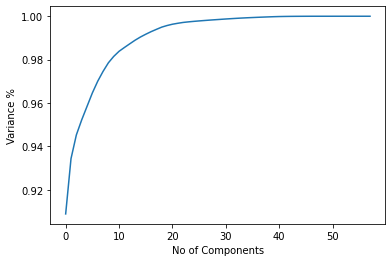

In [100]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance %')
plt.show()

In [103]:
dict5 = {'cols': df_simpI.columns, 'pca_imp': pca.explained_variance_ratio_}
df_pca = pd.DataFrame(dict5).sort_values(by = 'pca_imp', ascending = True)
df_pca['pca_imp'] = df_pca['pca_imp'].astype('float32')

In [104]:
df_pca

cols       pca_imp
57  ps_calc_20_bin  4.485385e-33
53  ps_calc_16_bin  4.485385e-33
56  ps_calc_19_bin  4.485385e-33
55  ps_calc_18_bin  4.485385e-33
54  ps_calc_17_bin  4.485385e-33
52  ps_calc_15_bin  4.485385e-33
51      ps_calc_14  3.708199e-07
50      ps_calc_13  6.035947e-07
49      ps_calc_12  8.642299e-07
48      ps_calc_11  1.215034e-06
47      ps_calc_10  2.173191e-06
46      ps_calc_09  7.033267e-06
45      ps_calc_08  1.155251e-05
44      ps_calc_07  1.508046e-05
43      ps_calc_06  2.201055e-05
42      ps_calc_05  3.389080e-05
41      ps_calc_04  4.277555e-05
40      ps_calc_03  6.898418e-05
39      ps_calc_02  8.816019e-05
38      ps_calc_01  9.408224e-05
37       ps_car_15  9.919235e-05
36       ps_car_14  1.065530e-04
35       ps_car_13  1.085127e-04
34       ps_car_12  1.242226e-04
33       ps_car_11  1.350149e-04
32   ps_car_11_cat  1.489238e-04
31   ps_car_10_cat  1.561714e-04
30   ps_car_09_cat  1.687414e-04
29   ps_car_08_cat  1.701524e-04
28   ps_car_07_cat  1.706482e-04
27   ps_car_06_cat  1.871310e-04
26   ps_car_05_cat  1.927134e-04
25   ps_car_04_cat  2.040458e-04
24   ps_car_03_cat  2.302815e-04
23   ps_car_02_cat  2.648789e-04
22   ps_car_01_cat  3.867024e-04
21       ps_reg_03  4.347375e-04
20       ps_reg_02  5.966778e-04
19       ps_reg_01  7.385178e-04
18   ps_ind_18_bin  1.028665e-03
17   ps_ind_17_bin  1.065795e-03
16   ps_ind_16_bin  1.191943e-03
15       ps_ind_15  1.282686e-03
14       ps_ind_14  1.470142e-03
13   ps_ind_13_bin  1.665981e-03
12   ps_ind_12_bin  1.695371e-03
11   ps_ind_11_bin  1.753932e-03
10   ps_ind_10_bin  2.359240e-03
9    ps_ind_09_bin  2.946617e-03
8    ps_ind_08_bin  3.970680e-03
7    ps_ind_07_bin  4.539040e-03
6    ps_ind_06_bin  5.382667e-03
5    ps_ind_05_cat  6.219435e-03
4    ps_ind_04_cat  6.228934e-03
3        ps_ind_03  6.933881e-03
2    ps_ind_02_cat  1.093280e-02
1        ps_ind_01  2.548902e-02
0           target  9.088306e-01

In [ ]:
['target','ps_ind_01','ps_ind_02_cat','ps_ind_03','ps_ind_04_cat','ps_ind_05_cat','ps_ind_06_bin',
'ps_ind_07_bin','ps_ind_08_bin','ps_ind_09_bin','ps_ind_10_bin','ps_ind_11_bin','ps_ind_12_bin',
'ps_ind_13_bin','ps_ind_14','ps_ind_15','ps_ind_16_bin','ps_ind_17_bin','ps_ind_18_bin','ps_reg_01',
'ps_reg_02','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_04_cat','ps_car_06_cat']

In [105]:
clf = PCA(n_components=20)
clf

PCA(n_components=20)

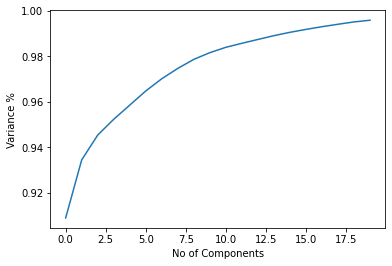

In [107]:
PrincipalComponents = clf.fit_transform(df_simpI)
plt.figure()
plt.plot(np.cumsum(clf.explained_variance_ratio_))
plt.xlabel('No of Components')
plt.ylabel('Variance %')
plt.show()

# PyCaret

In [ ]:
pc.setup(df_ds, target='target')

In [ ]:
pc.compare_models()

In [ ]:
pc.create_model()

# PandasProfiling

In [108]:
from pandas_profiling import ProfileReport

In [ ]:
# df_s = df.sample(frac=0.01)
# df1 = df_s.iloc[:,:10]

In [ ]:
r1 = ProfileReport(df_ds)
r1.to_file('auto_insur_knn.html')

In [ ]:
# import sweetviz as sv # Not working to check?
# analyze = sv.analyze(df)

In [ ]:
# sns.pairplot(df)